In [173]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [175]:
#Importing all the libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [176]:
!pip install openpyxl


In [177]:
df1 = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name="Full_new")
df2 = pd.read_csv("PCOS_infertility.csv")



In [178]:
df1

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0        152.000  19.300000           15                78                22   
1        161.500  24.921163           15                74                20   
2        165.000  25.270891           11                72                18   
3        148.000  29.674945           13                72                20   
4        161.000  20.060954           11                72                18   
..           ...        ...          ...               ...               ...   
536      164.592  18.500000           17                72                16   
537      158.000  25.300000           15                72                18   
538      152.000  23.400000           13                74                20   
539      150.000  22.200000           15                74                20   
540      165.000  30.100000           13                80                20   

     ...  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0    ...              1.0                  0                  110   
1    ...              0.0                  0                  120   
2    ...              1.0                  0                  120   
3    ...              0.0                  0                  120   
4    ...              0.0                  0                  120   
..   ...              ...                ...                  ...   
536  ...              0.0                  0                  110   
537  ...              0.0                  0                  110   
538  ...              0.0                  0                  110   
539  ...              0.0                  0                  110   
540  ...              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                      80                 3                 3   
1                      70                 3                 5   
2                      80                13                15   
3                      70                 2                 2   
4                      80                 3                 4   
..                    ...               ...               ...   
536                    70                 1                 0   
537                    70                 9                 7   
538                    80                 1                 0   
539                    70                 7                 6   
540                    70                 9                10   

     Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                    18.0                 18.0               8.5          NaN  
1                    15.0                 14.0               3.7          NaN  
2                    18.0                 20.0              10.0          NaN  
3                    15.0                 14.0               7.5          NaN  
4                    16.0                 14.0               7.0          NaN  
..                    ...                  ...               ...          ...  
536                  17.5        

In [179]:
df2

Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0         1             10001           0                    1.99   
1         2             10002           0                   60.80   
2         3             10003           1                  494.08   
3         4             10004           0                    1.99   
4         5             10005           0                  801.45   
..      ...               ...         ...                     ...   
536     537             10537           0                    1.99   
537     538             10538           0                   80.13   
538     539             10539           0                    1.99   
539     540             10540           0                  292.92   
540     541             10541           1                    1.99   

     II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                      1.99       2.07  
1                      1.99       1.53  
2                    494.08       6.63  
3                      1.99       1.22  
4                    801.45       2.26  
..                      ...        ...  
536                    1.99        1.7  
537                    1.99        5.6  
538                    1.99        3.7  
539                    1.99        5.2  
540                    1.99         20  

[541 rows x 6 columns]

In [180]:
# Merging the two files based on 'Patient File No.'
data = pd.merge(df1, df2, on='Patient File No.', suffixes=('', '_y'), how='left')

# Dropping the repeated features after merging
data = data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', 
                  '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y', 
                  'AMH(ng/mL)_y'], axis=1)


In [181]:
data.columns = [col.strip() for col in data.columns]  # Remove extra spaces

In [182]:
print(data.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3   Age (yrs)               541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [184]:
# Having a look at the data with dtype objects
data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [185]:
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [186]:
# Converting string numeric columns to actual numeric types
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

# Dealing with missing values by filling NA values with the median
data['Marraige Status (Yrs)'] = data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median())
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median())
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median())
data['Fast food (Y/N)'] = data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median())

# Cleaning up extra spaces in column names
data.columns = [col.strip() for col in data.columns]


In [187]:
# Exploratory Data Analysis
data.describe()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)         BMI  Blood Group  Pulse rate(bpm)  RR (breaths/min)  \
count  541.000000  541.000000   541.000000       541.000000        541.000000   
mean   156.484835   24.311285    13.802218        73.247689         19.243993   
std      6.033545    4.056399     1.840812         4.430285          1.688629   
min    137.000000   12.417882    11.000000        13.000000         16.000000   
25%    152.000000   21.641274    13.000000        72.000000         18.000000   
50%    156.000000   24.238227    14.000000        72.000000         18.000000   
75%    160.000000   26.634958    15.000000        74.000000         20.000000   
max    180.000000   38.900000    18.000000        82.000000         28.000000   

       ...  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
count  ...    541.000000       541.000000         541.000000   
mean   ...      0.489834         0.515712           0.247689   
std    ...      0.500359         0.500216           0.432070   
min    ...      0.000000         0.000000           0.000000   
25%    ...      0.000000         0.000000           0.000000   
50%    ...      0.000000         1.000000           0.000000   
75%    ...      1.000000         1.000000           0.000000   
max    ...      1.000000         1.000000           1.000000   

       BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
count           541.000000            541.000000        541.000000   
mean            114.661738             76.927911          6.129390   
std               7.384556              5.574112          4.229294   
min              12.000000              8.000000          0.000000   
25%             110.000000             70.000000          3.000000   
50%             110.000000             80.000000          5.000000   
75%             120.000000             80.000000          9.000000   
max             140.000000            100.000000         22.000000   

       Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
count        541.000000            541.000000            541.000000   
mean           6.641405             15.018115             15.451701   
std            4.436889              3.566839              3.318848   
min            0.000000              0.000000              0.000000   
25%            3.000000             13.000000             13.000000   
50%            6.000000             15.000000             16.000000   
75%           10.000000             18.000000             18.000000   
max           20.000000             24.000000             24.000000   

       Endometrium (mm)  
count        541.000000  
mean           8.475915  
std            2.165381  
min            0.000000  
25%            7.000000  
50%            8.500000  
75%            9.800000  
max           18.000000  

[8 rows x 44 columns]

In [188]:
print(data.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [189]:
#Dropping the outliers. 

data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]

data.shape

(526, 44)

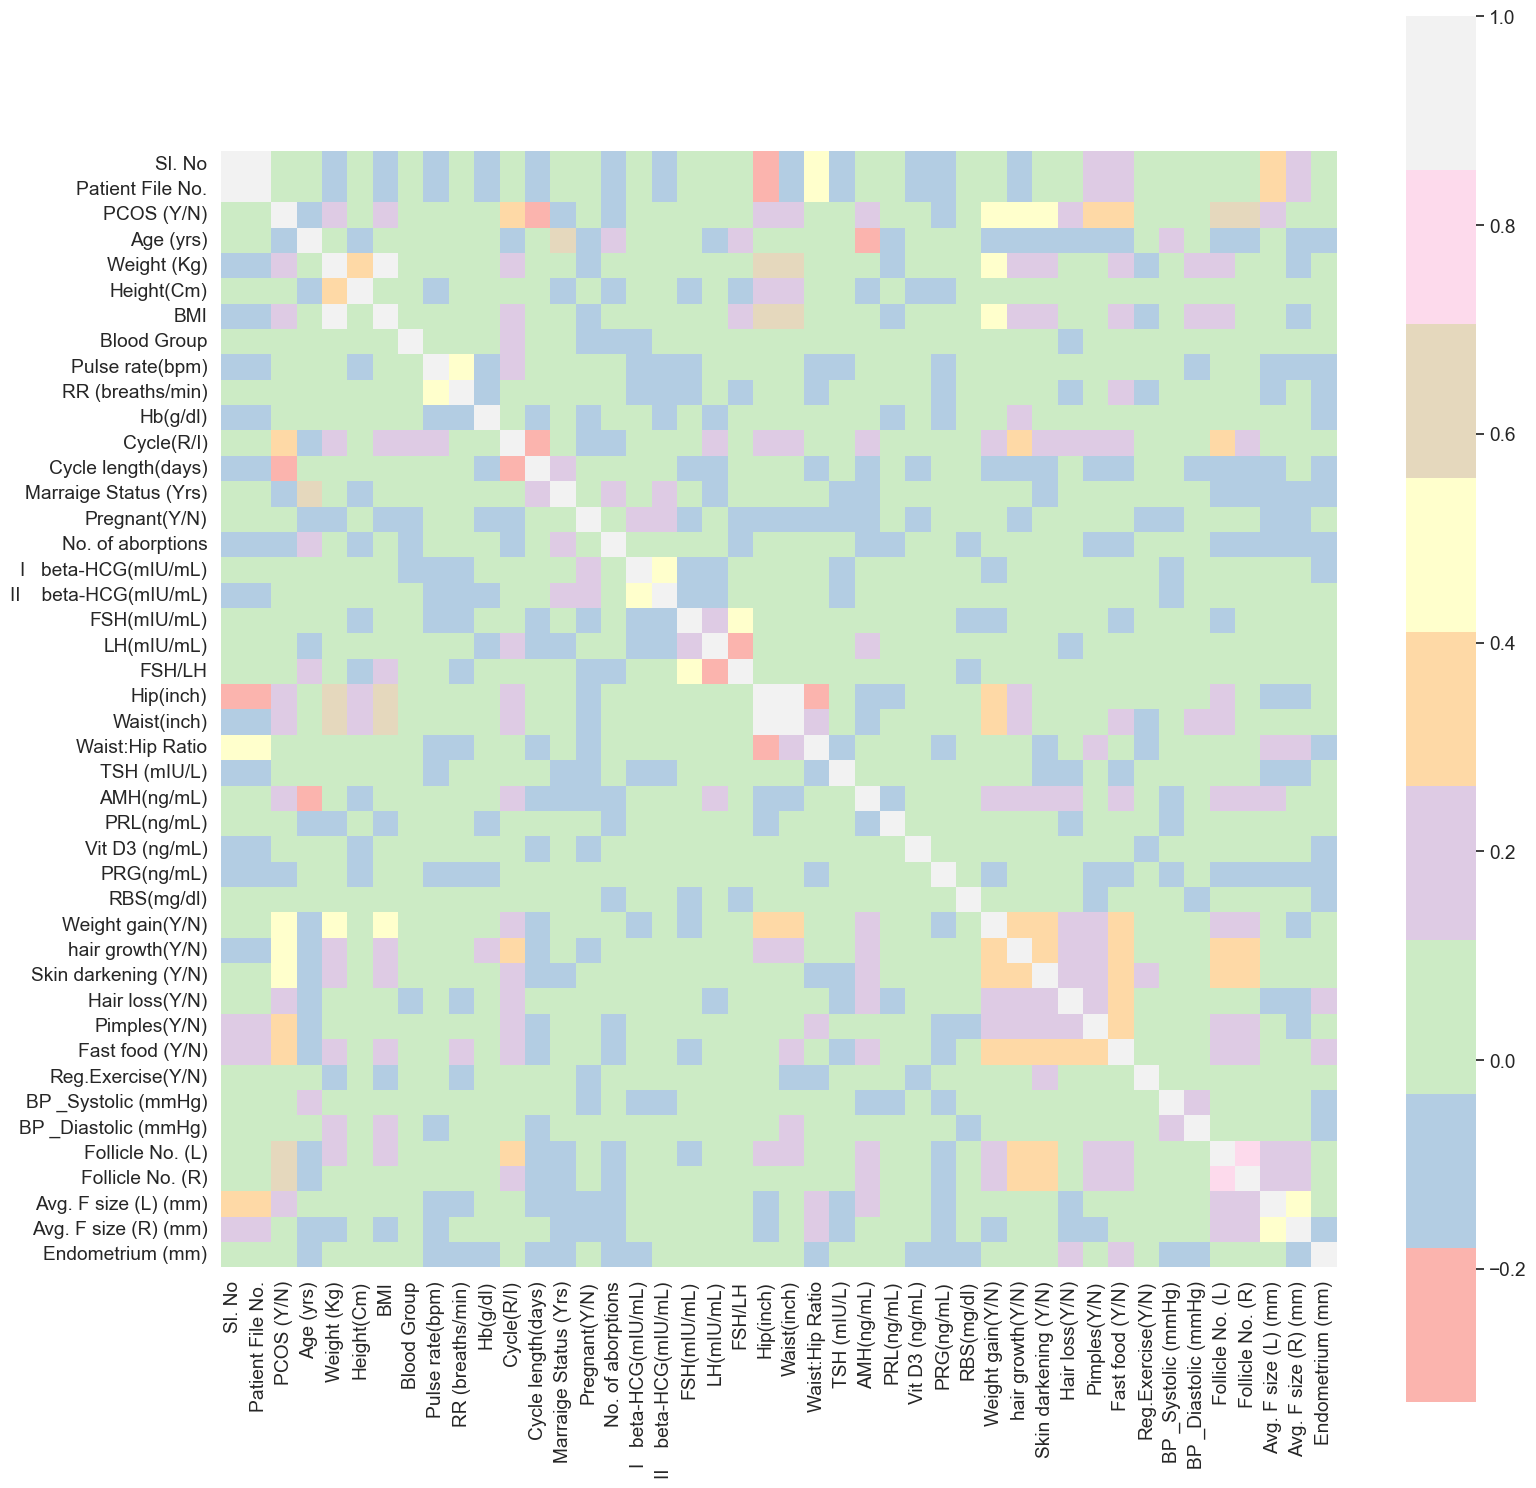

In [190]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [191]:
#How all the features correlate with the PCOS 
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.650915
Follicle No. (L)          0.605305
Skin darkening (Y/N)      0.474561
hair growth(Y/N)          0.463557
Weight gain(Y/N)          0.445646
Cycle(R/I)                0.404082
Fast food (Y/N)           0.376877
Pimples(Y/N)              0.295313
AMH(ng/mL)                0.261105
Weight (Kg)               0.210241
BMI                       0.194121
Hair loss(Y/N)            0.176603
Hip(inch)                 0.163335
Waist(inch)               0.160226
Avg. F size (L) (mm)      0.124990
Pulse rate(bpm)           0.102988
LH(mIU/mL)                0.095426
Hb(g/dl)                  0.094481
Vit D3 (ng/mL)            0.086052
Endometrium (mm)          0.085608
Avg. F size (R) (mm)      0.084756
Height(Cm)                0.075431
Reg.Exercise(Y/N)         0.061816
Sl. No                    0.051936
Patient File No.          0.051936
FSH/LH                    0.043591
Blood Group               0.043032
RR (breaths/min)    

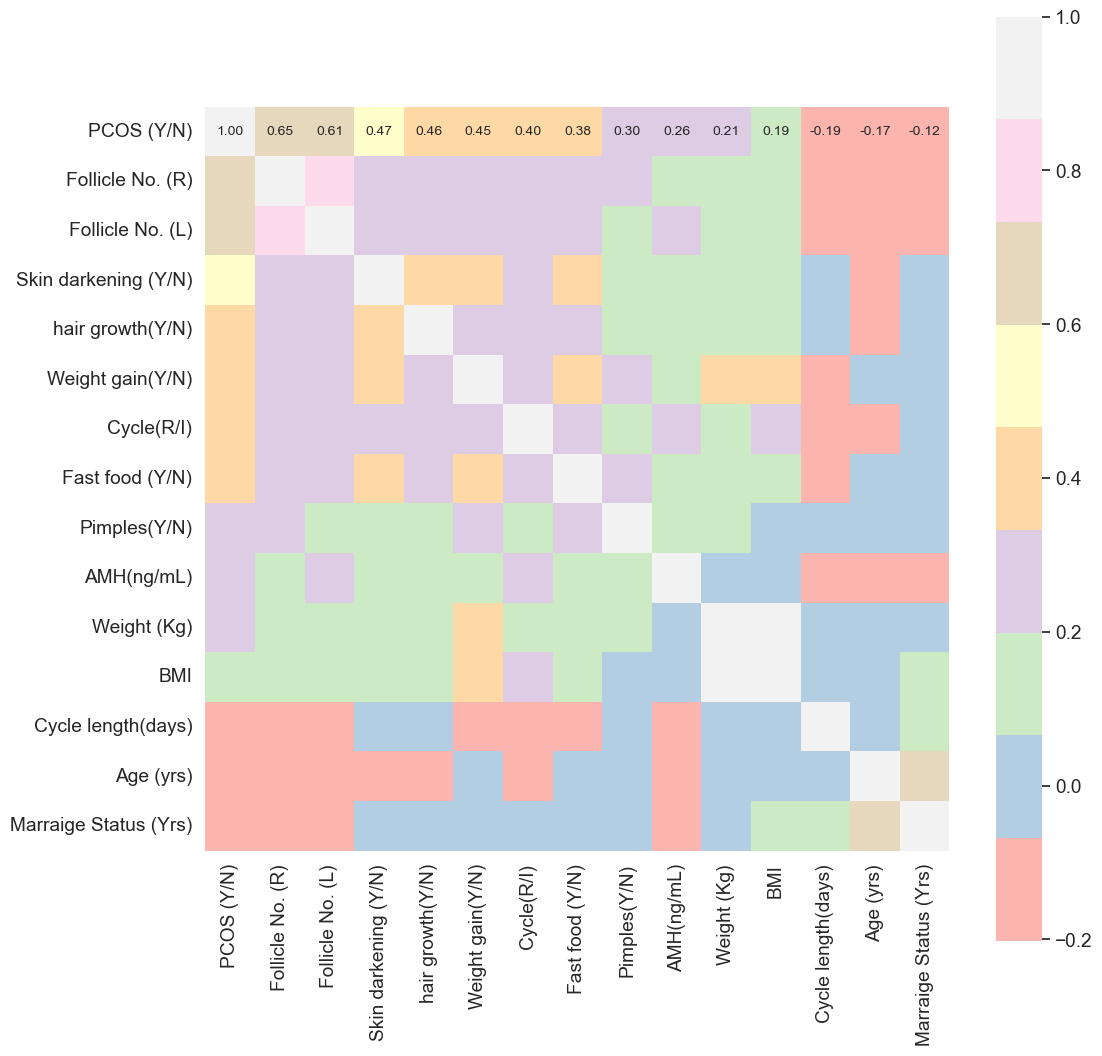

In [192]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

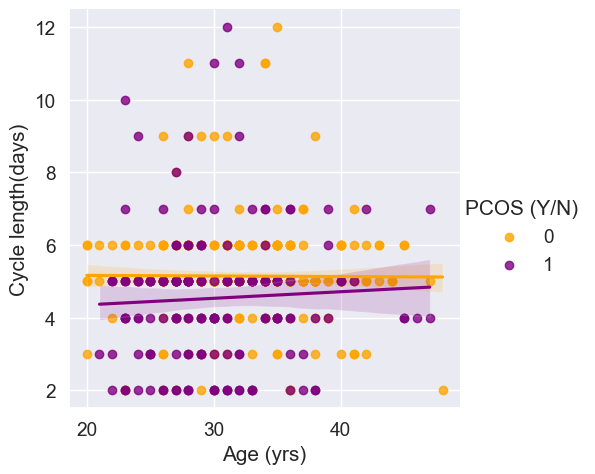

In [193]:
# Length of menstrual phase in PCOS vs normal 
color = ["orange", "purple"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

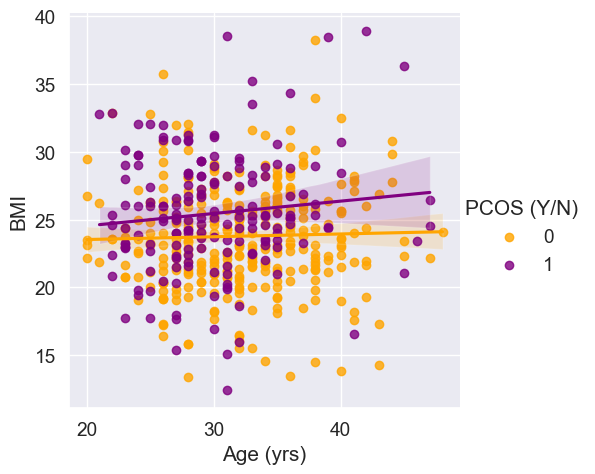

In [194]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

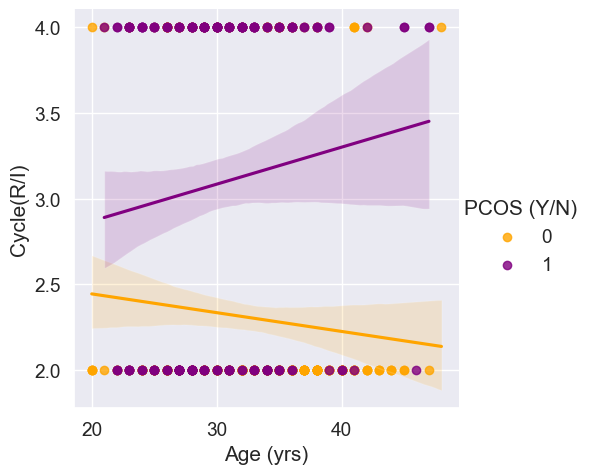

In [195]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

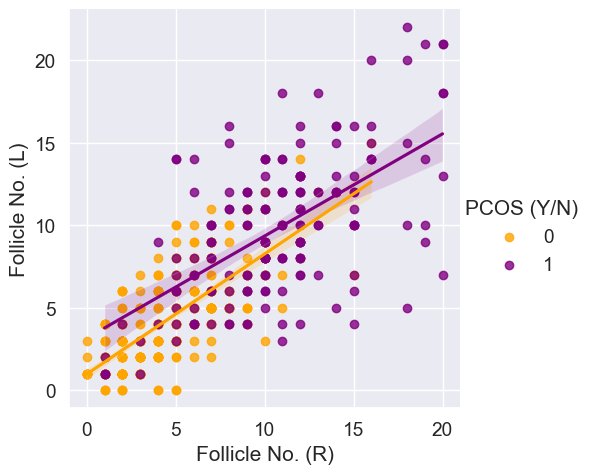

In [196]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

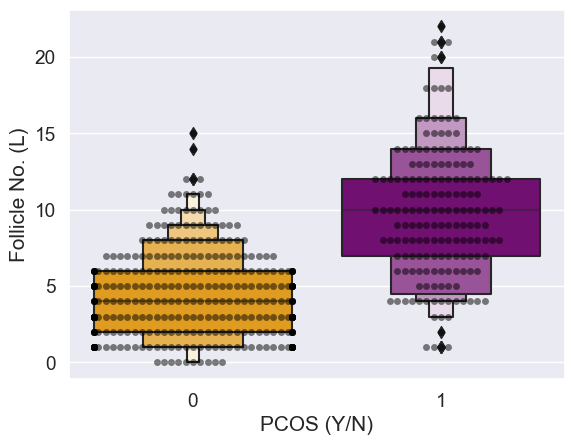

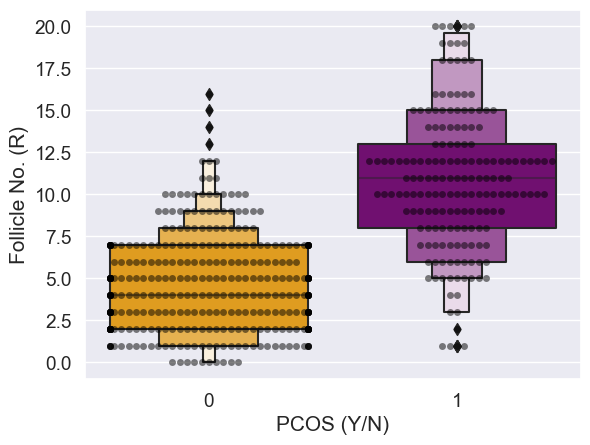

In [197]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

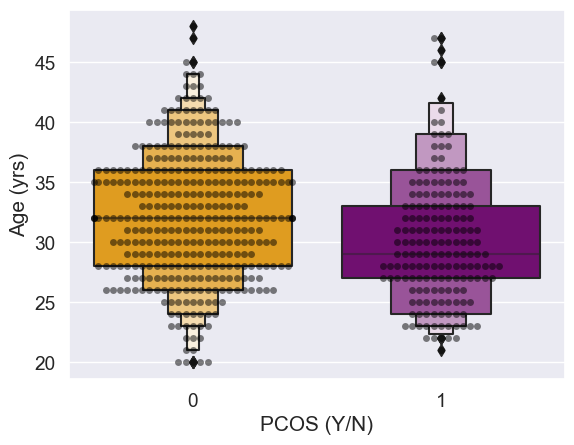

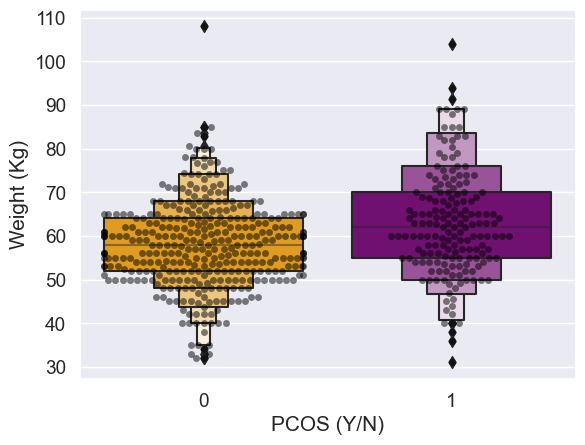

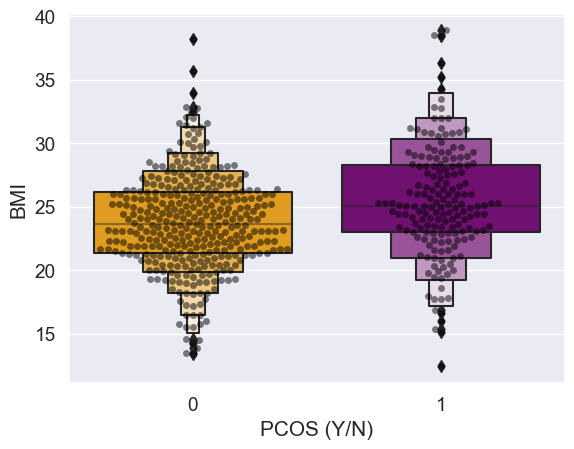

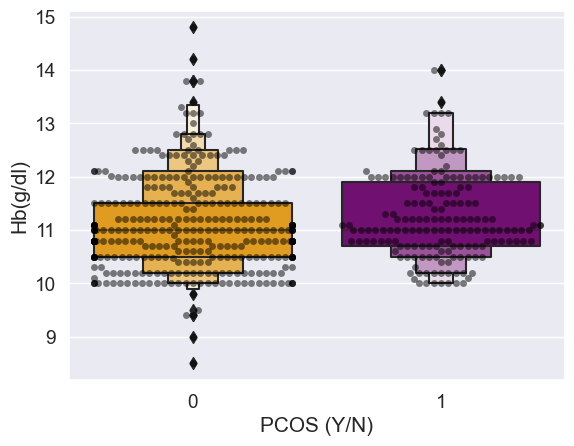

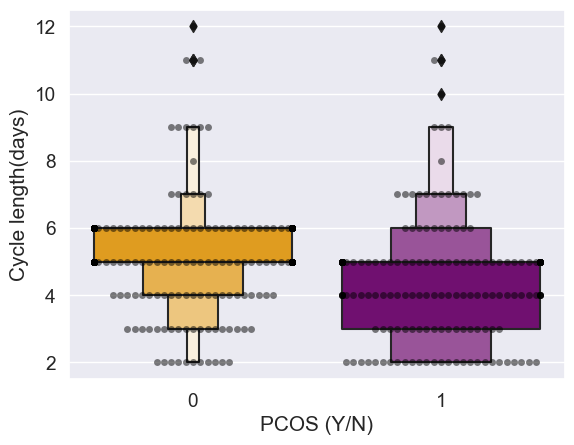

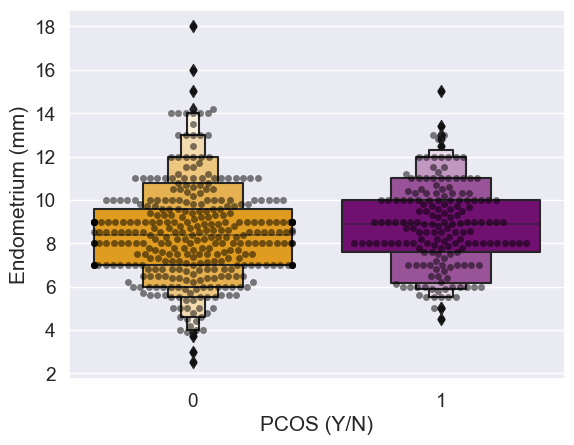

In [198]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

In [199]:
#Model and training
#Assiging the features (X)and target(y)

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=data["PCOS (Y/N)"]

#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

Model: Random Forest
Accuracy: 0.8544
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       101
           1       0.84      0.74      0.79        57

    accuracy                           0.85       158
   macro avg       0.85      0.83      0.84       158
weighted avg       0.85      0.85      0.85       158

Model: Logistic Regression
Accuracy: 0.8291
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       101
           1       0.80      0.70      0.75        57

    accuracy                           0.83       158
   macro avg       0.82      0.80      0.81       158
weighted avg       0.83      0.83      0.83       158

Model: Decision Tree
Accuracy: 0.7658
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       101
           1       0.68      0.67      0.67     

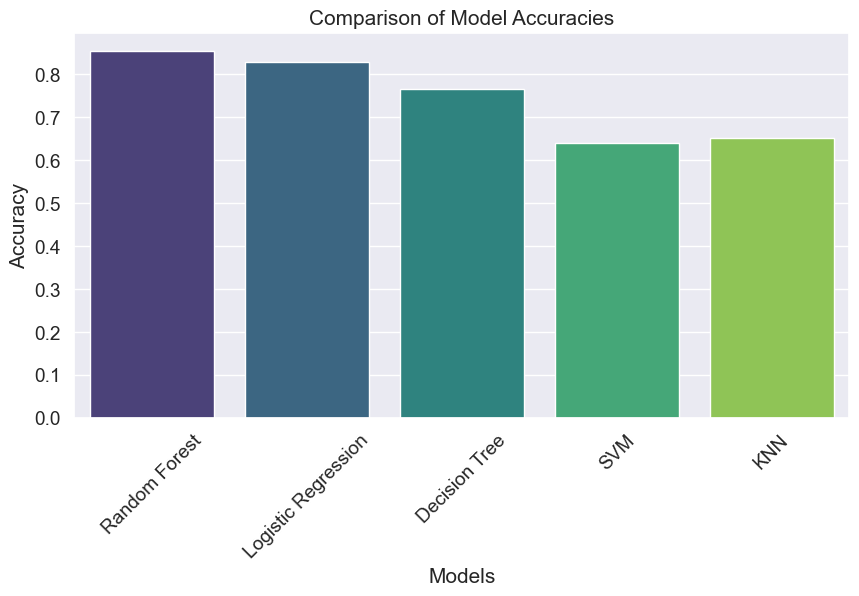

In [200]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
}

# Train, evaluate, and compare models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 60)

# Visualizing accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45)
plt.show()

In [201]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, pred_rfc)
print("Random Forest Accuracy:", accuracy_rfc)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, pred_dtc)
print("Decision Tree Accuracy:", accuracy_dtc)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, pred_svm)
print("SVM Accuracy:", accuracy_svm)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, pred_knn)
print("KNN Accuracy:", accuracy_knn)


Random Forest Accuracy: 0.8860759493670886
Logistic Regression Accuracy: 0.8291139240506329
Decision Tree Accuracy: 0.8037974683544303
SVM Accuracy: 0.6392405063291139
KNN Accuracy: 0.6518987341772152


In [202]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=parameters,
    cv=3, 
    n_jobs=-1,  
    verbose=3   
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [203]:
rfc1=RandomForestClassifier(**grid_search.best_params_)
rfc1.fit(X_train, y_train)

predictions=rfc1.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

print("acccuracy_final: ",acccuracy_final)

acccuracy_final:  0.8607594936708861


In [204]:
classi_report = classification_report(y_test, predictions)
print(classi_report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       101
           1       0.87      0.72      0.79        57

    accuracy                           0.86       158
   macro avg       0.86      0.83      0.84       158
weighted avg       0.86      0.86      0.86       158



<Axes: >

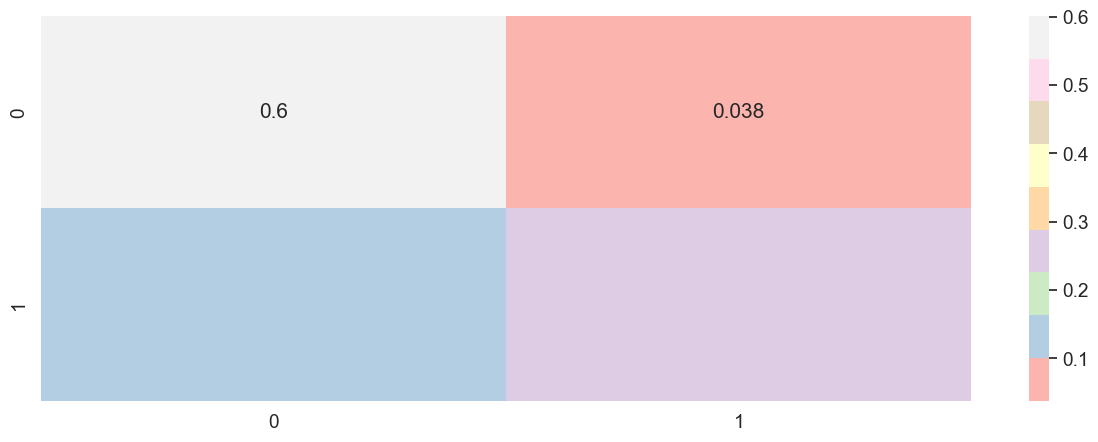

In [205]:
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

In [206]:
unique_number = []
for i in data.columns:
    x = data[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = data.columns, columns = ["Total Unique Values"])

Total Unique Values
Sl. No                                  526
Patient File No.                        526
PCOS (Y/N)                                2
Age (yrs)                                29
Weight (Kg)                             116
Height(Cm)                               50
BMI                                     347
Blood Group                               8
Pulse rate(bpm)                           9
RR (breaths/min)                          8
Hb(g/dl)                                 46
Cycle(R/I)                                2
Cycle length(days)                       11
Marraige Status (Yrs)                    34
Pregnant(Y/N)                             2
No. of aborptions                         6
I   beta-HCG(mIU/mL)                    299
II    beta-HCG(mIU/mL)                  197
FSH(mIU/mL)                             363
LH(mIU/mL)                              335
FSH/LH                                  497
Hip(inch)                                19
Waist(inch)                              23
Waist:Hip Ratio                          96
TSH (mIU/L)                             304
AMH(ng/mL)                              292
PRL(ng/mL)                              469
Vit D3 (ng/mL)                          326
PRG(ng/mL)                               87
RBS(mg/dl)                               53
Weight gain(Y/N)                          2
hair growth(Y/N)                          2
Skin darkening (Y/N)                      2
Hair loss(Y/N)                            2
Pimples(Y/N)                              2
Fast food (Y/N)                           2
Reg.Exercise(Y/N)                         2
BP _Systolic (mmHg)                       5
BP _Diastolic (mmHg)                      4
Follicle No. (L)                         21
Follicle No. (R)                         20
Avg. F size (L) (mm)                     31
Avg. F size (R) (mm)                     31
Endometrium (mm)                         89

In [207]:
data.head()

Sl. No  Patient File No.  PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)  \
0       1                 1           0         28         44.6       152.0   
1       2                 2           0         36         65.0       161.5   
2       3                 3           1         33         68.8       165.0   
3       4                 4           0         37         65.0       148.0   
4       5                 5           0         25         52.0       161.0   

         BMI  Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  \
0  19.300000           15               78                22  ...   
1  24.921163           15               74                20  ...   
2  25.270891           11               72                18  ...   
3  29.674945           13               72                20  ...   
4  20.060954           11               72                18  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 44 columns]

In [208]:
categoric_var = ["PCOS (Y/N)", "Cycle(R/I)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)"]

numeric_var = ["Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Blood Group", "Pulse rate(bpm)", "RR (breaths/min)", "Hb(g/dl)", "Cycle length(days)", "Marraige Status (Yrs)", "No. of aborptions", "I   beta-HCG(mIU/mL)", "II    beta-HCG(mIU/mL)", "FSH(mIU/mL)", "LH(mIU/mL)", "FSH/LH", "Hip(inch)", "Waist(inch)", "Waist:Hip Ratio", "TSH (mIU/L)", "AMH(ng/mL)", "PRL(ng/mL)", "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", "Follicle No. (L)", "Follicle No. (R)", "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", "Endometrium (mm)"]

In [209]:
data[numeric_var].describe()

Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
count  526.000000   526.000000  526.000000  526.000000   526.000000   
mean    31.452471    59.575665  156.354175   24.329802    13.823194   
std      5.422407    11.000934    5.959093    4.075449     1.843680   
min     20.000000    31.000000  137.000000   12.417882    11.000000   
25%     27.000000    52.000000  152.000000   21.689346    13.000000   
50%     31.000000    59.300000  156.000000   24.300000    15.000000   
75%     35.000000    65.000000  160.000000   26.691667    15.000000   
max     48.000000   108.000000  180.000000   38.900000    18.000000   

       Pulse rate(bpm)  RR (breaths/min)    Hb(g/dl)  Cycle length(days)  \
count       526.000000        526.000000  526.000000          526.000000   
mean         73.475285         19.256654   11.156046            4.941065   
std           2.704909          1.689380    0.865729            1.492312   
min          70.000000         16.000000    8.500000            2.000000   
25%          72.000000         18.000000   10.500000            4.000000   
50%          72.000000         18.000000   11.000000            5.000000   
75%          74.000000         20.000000   11.700000            5.000000   
max          82.000000         28.000000   14.800000           12.000000   

       Marraige Status (Yrs)  ...  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  \
count             526.000000  ...      526.000000  526.000000  526.000000   
mean                7.676236  ...       50.548380    0.410401   99.285551   
std                 4.792505  ...      351.093386    0.391936   14.176490   
min                 0.000000  ...        0.000000    0.047000   60.000000   
25%                 4.000000  ...       20.725000    0.250000   92.000000   
50%                 7.000000  ...       25.950000    0.310000  100.000000   
75%                10.000000  ...       34.650000    0.457500  107.000000   
max                30.000000  ...     6014.660000    6.390000  160.000000   

       BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
count           526.000000            526.000000        526.000000   
mean            114.847909             77.072243          6.144487   
std               5.942235              4.719010          4.255869   
min             100.000000             60.000000          0.000000   
25%             110.000000             70.000000          3.000000   
50%             110.000000             80.000000          5.000000   
75%             120.000000             80.000000          9.000000   
max             140.000000            100.000000         22.000000   

       Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
count        526.000000             526.00000            526.000000   
mean           6.650190              15.03384             15.477890   
std            4.439999               3.58559              3.273333   
min            0.000000               0.00000              0.170000   
25%            3.000000              13.00000             13.000000   
50%            6.000000              15.00000             16.000000   
75%           10.000000              18.00000             18.000000   
max           20.000000              24.00000             24.000000   

       Endometrium (mm)  
count        526.000000  
mean           8.525133  
std            2.112652  
min            2.500000  
25%            7.000000  
50%            8.500000  
75%            9.800000  
max           18.000000  

[8 rows x 32 columns]

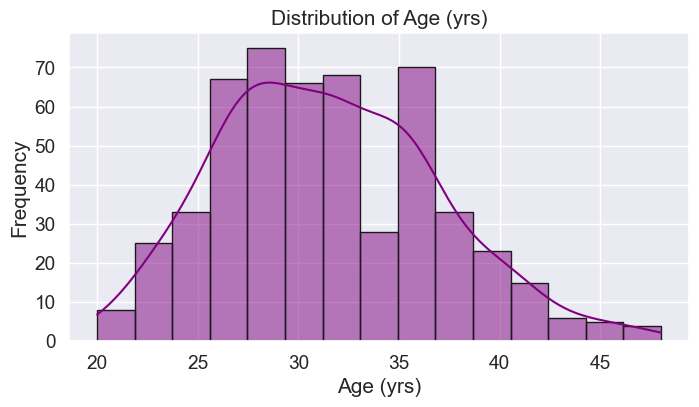

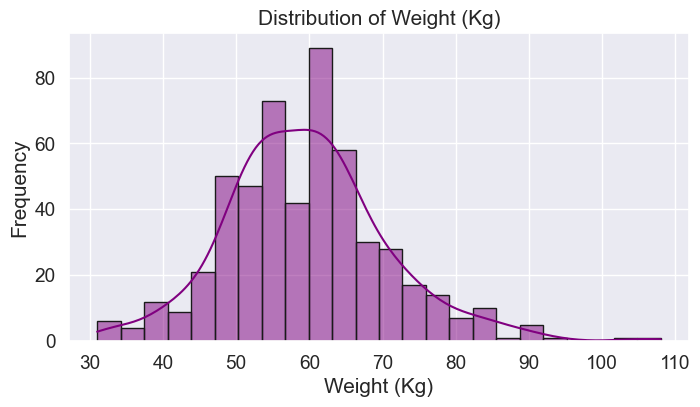

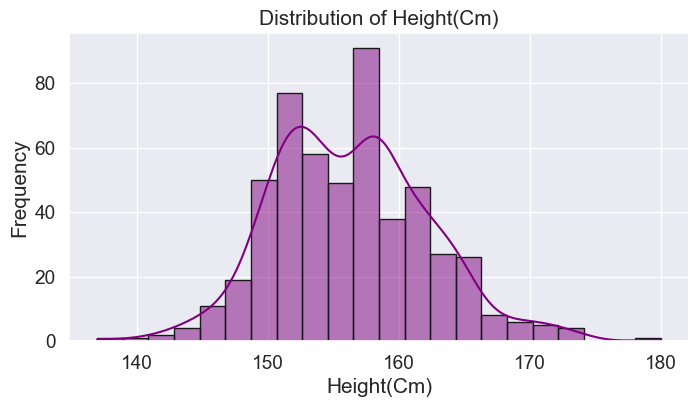

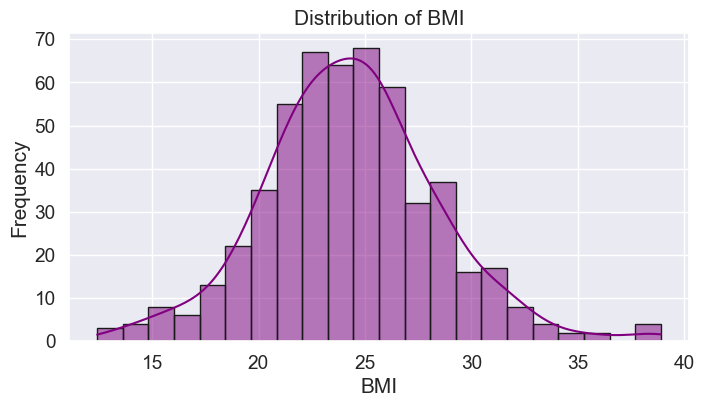

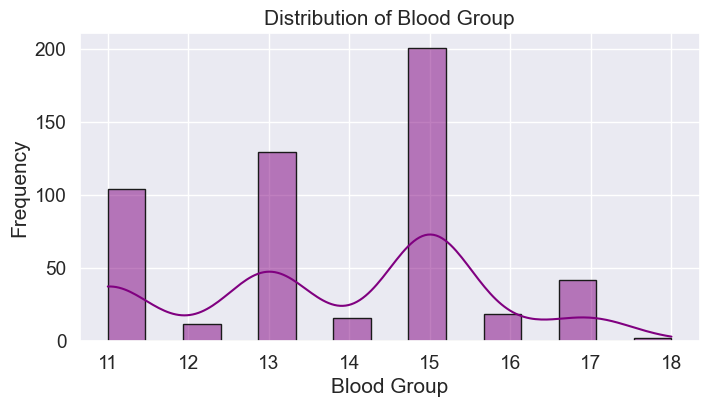

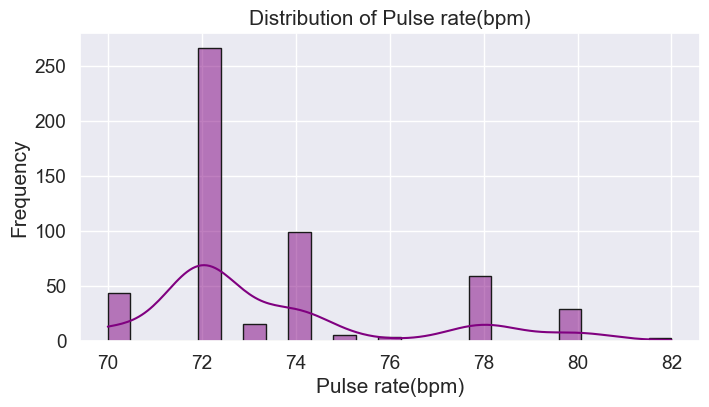

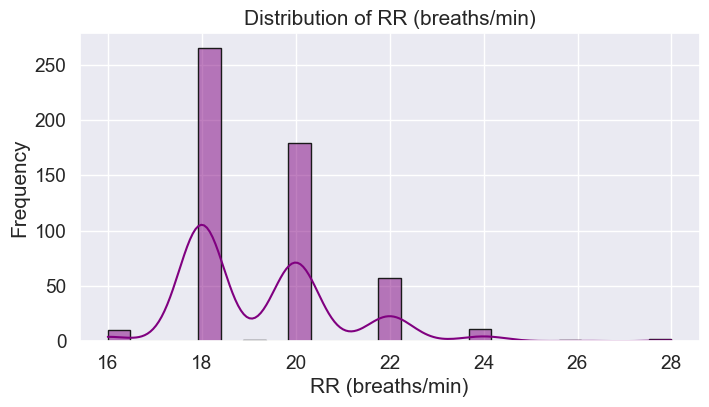

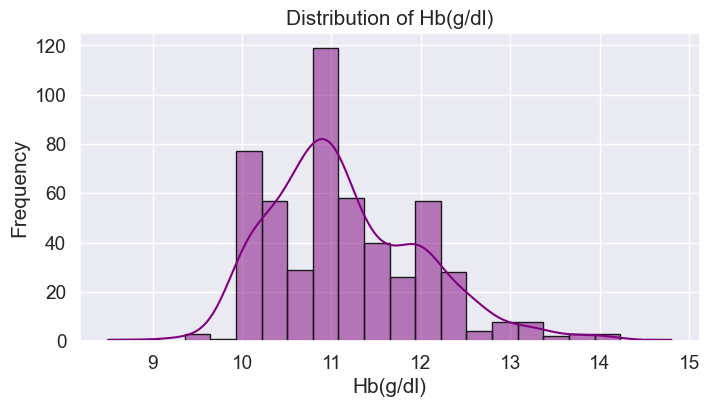

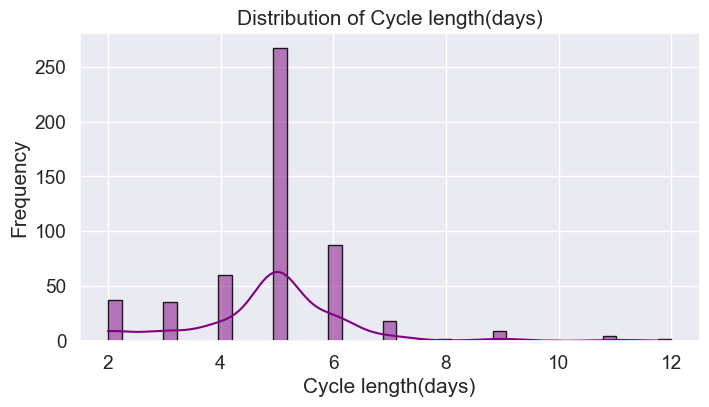

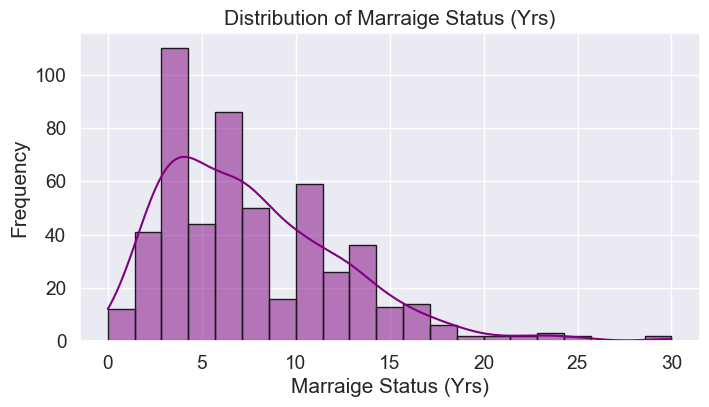

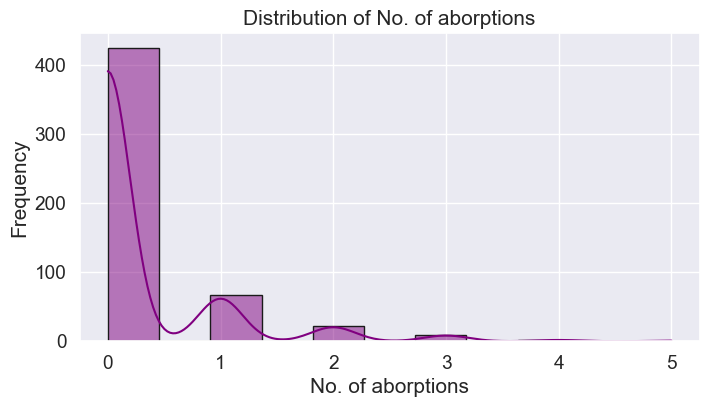

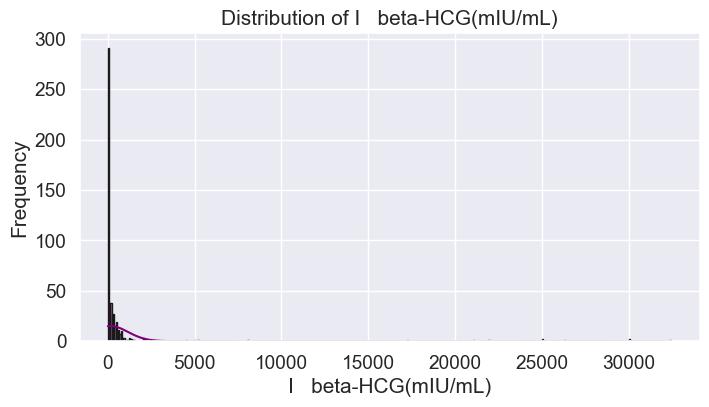

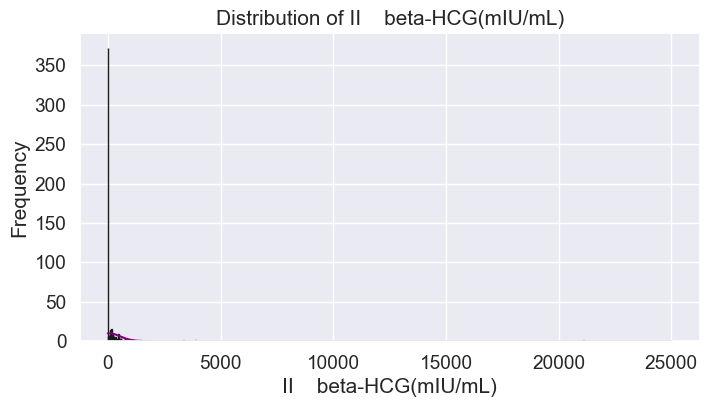

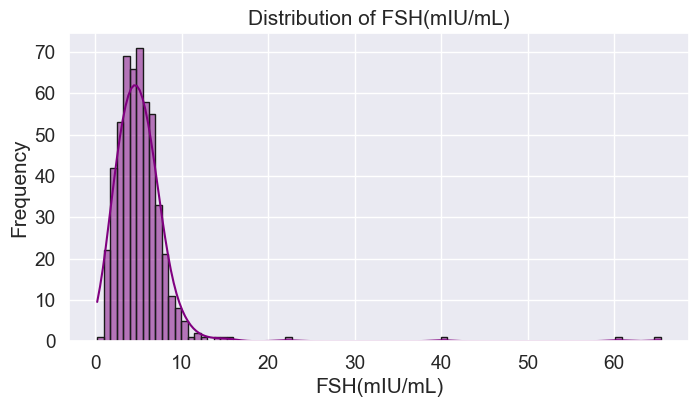

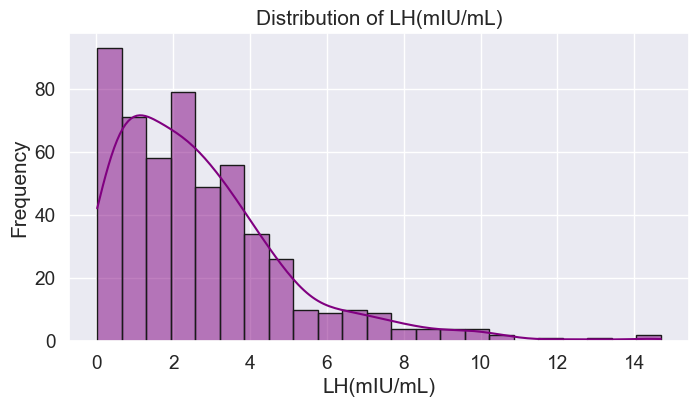

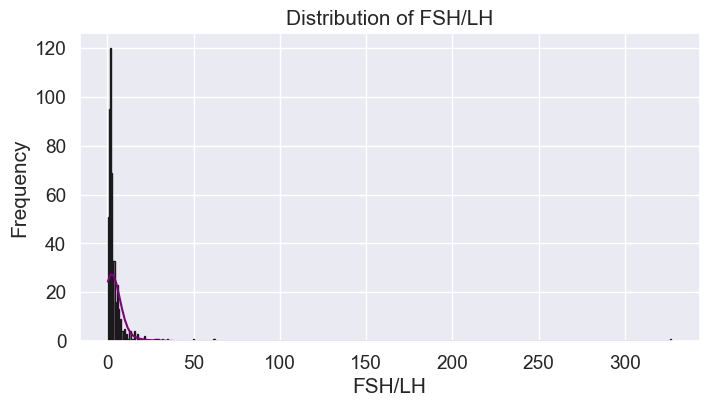

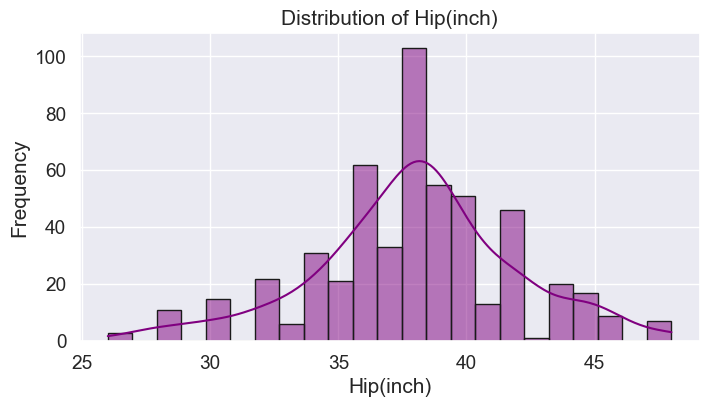

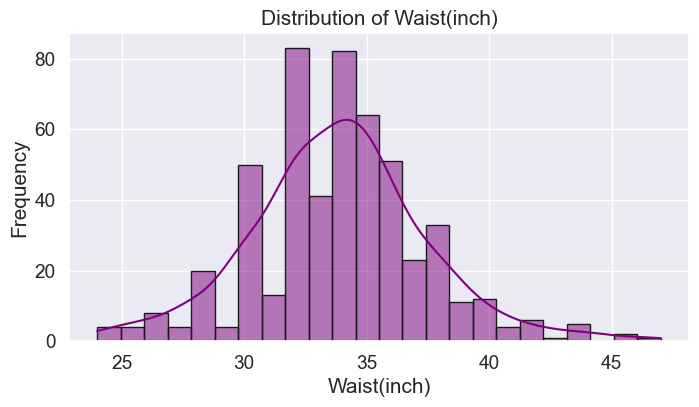

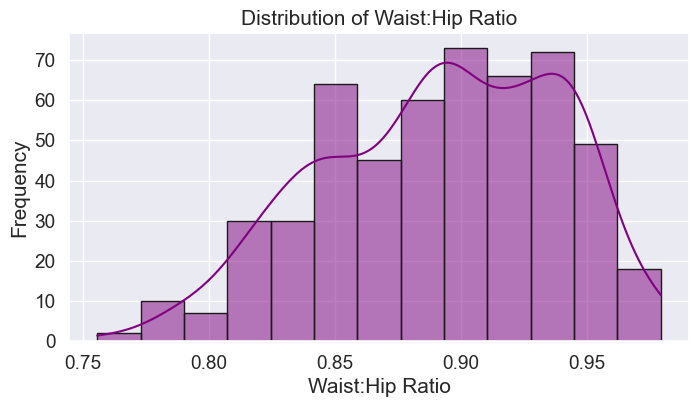

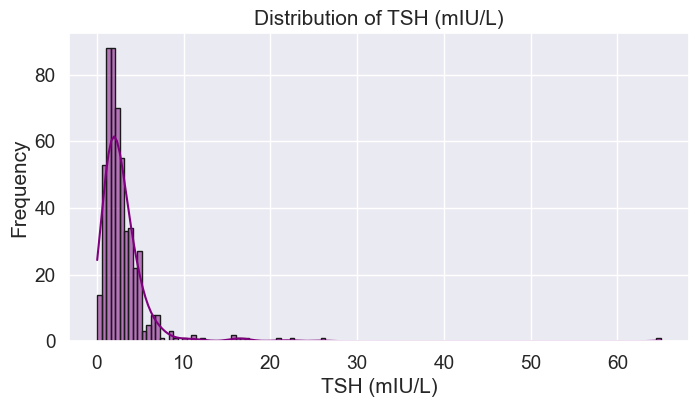

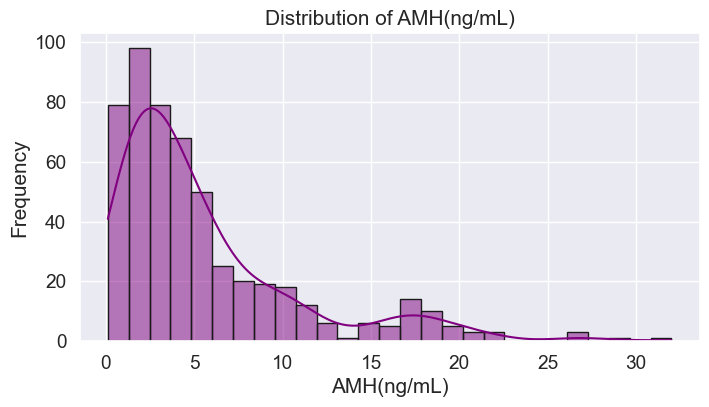

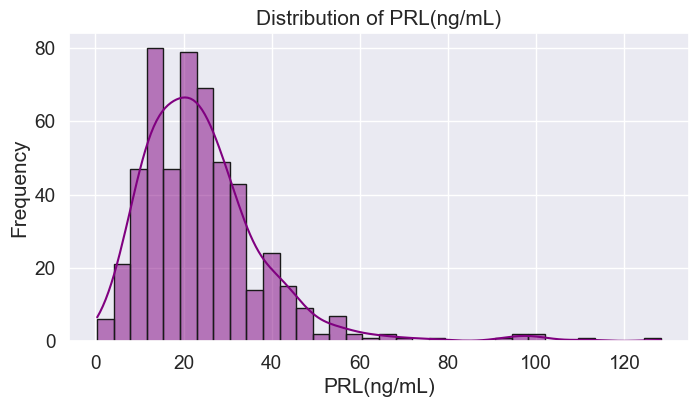

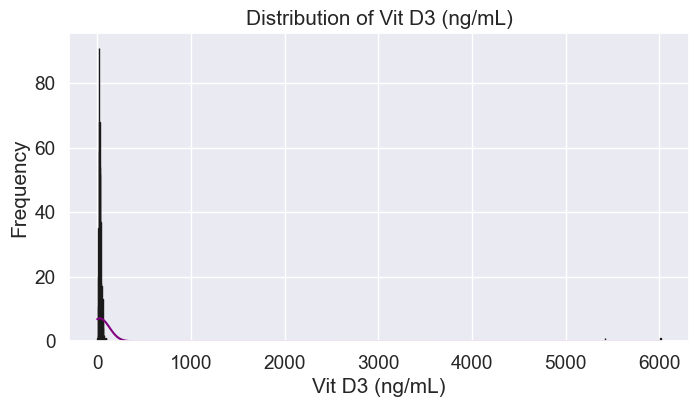

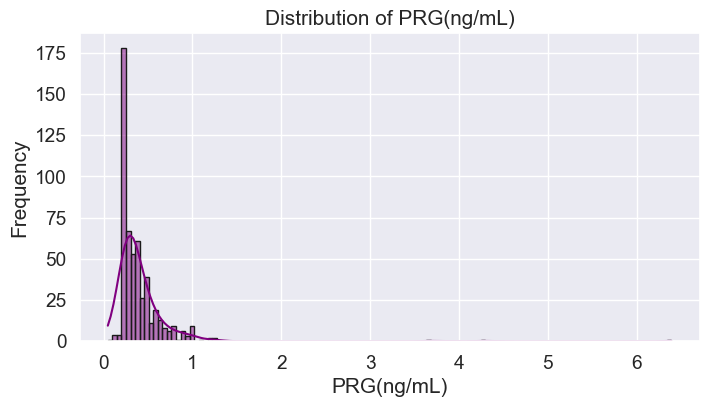

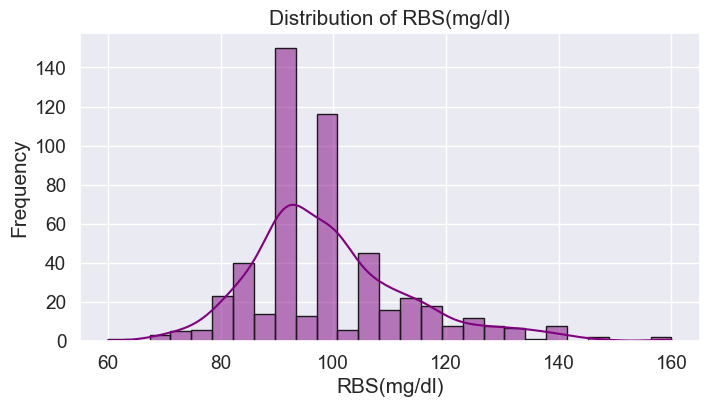

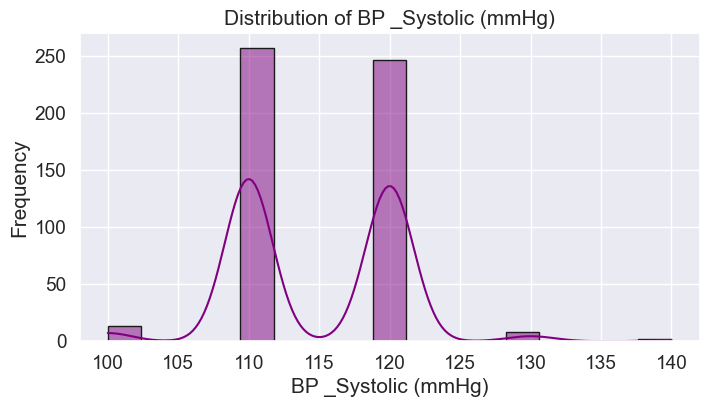

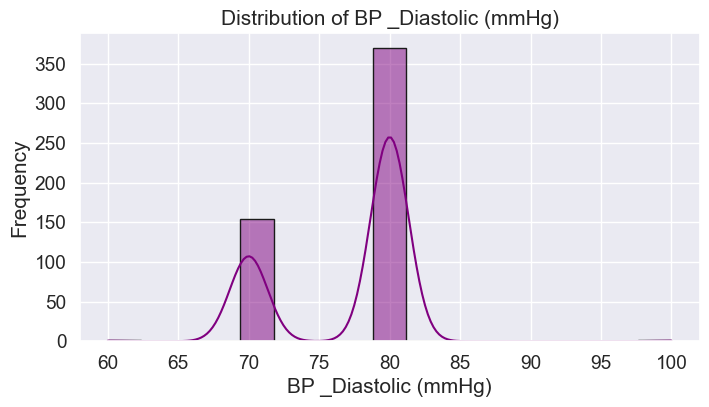

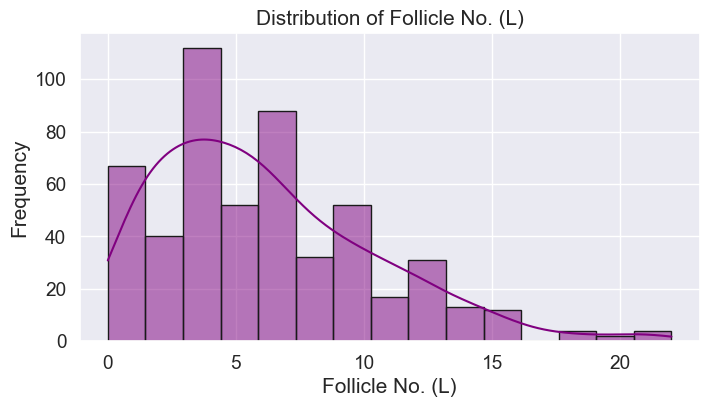

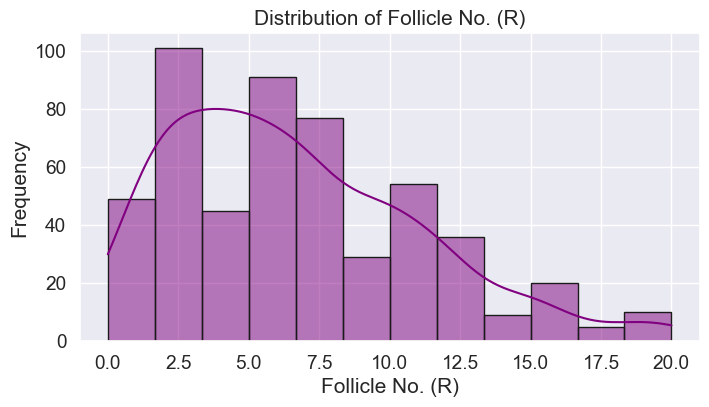

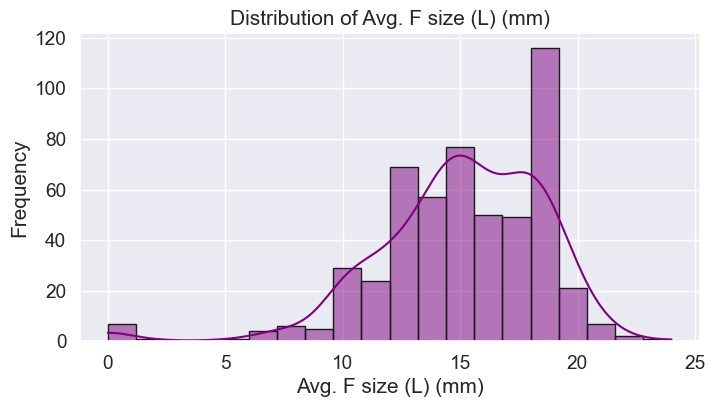

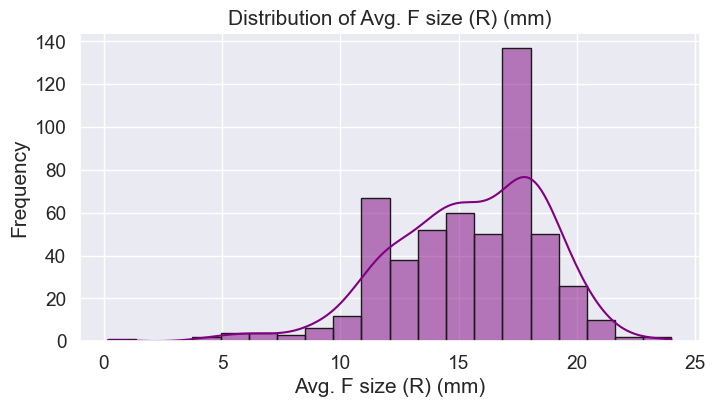

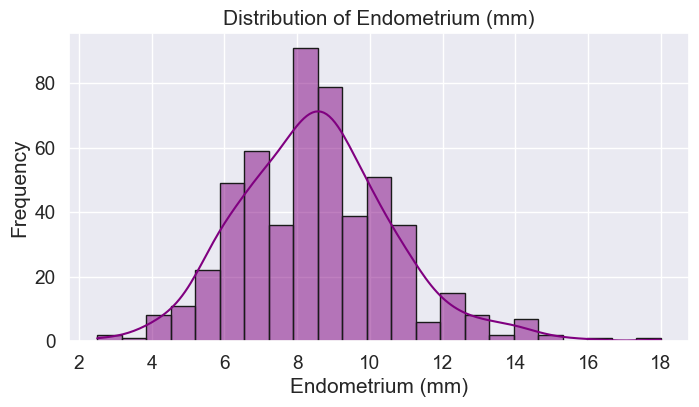

In [210]:
columns = [
    "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Blood Group", "Pulse rate(bpm)",
    "RR (breaths/min)", "Hb(g/dl)", "Cycle length(days)", "Marraige Status (Yrs)",
    "No. of aborptions", "I   beta-HCG(mIU/mL)", "II    beta-HCG(mIU/mL)", "FSH(mIU/mL)",
    "LH(mIU/mL)", "FSH/LH", "Hip(inch)", "Waist(inch)", "Waist:Hip Ratio", "TSH (mIU/L)",
    "AMH(ng/mL)", "PRL(ng/mL)", "Vit D3 (ng/mL)", "PRG(ng/mL)", "RBS(mg/dl)",
    "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)", "Follicle No. (L)", "Follicle No. (R)",
    "Avg. F size (L) (mm)", "Avg. F size (R) (mm)", "Endometrium (mm)"
]

for col in columns:
    if col in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, linewidth=1, edgecolor="k", color="purple")
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


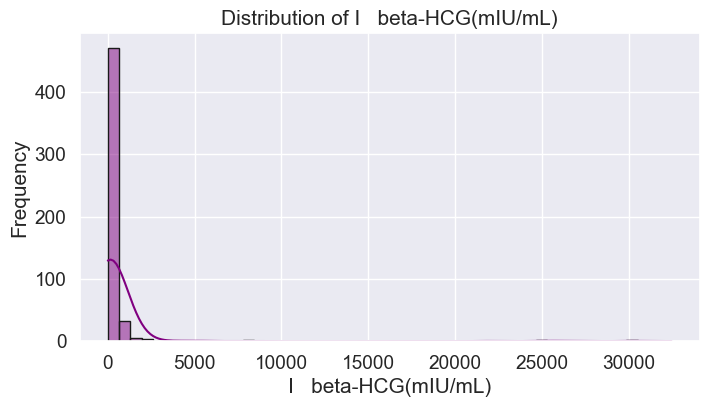

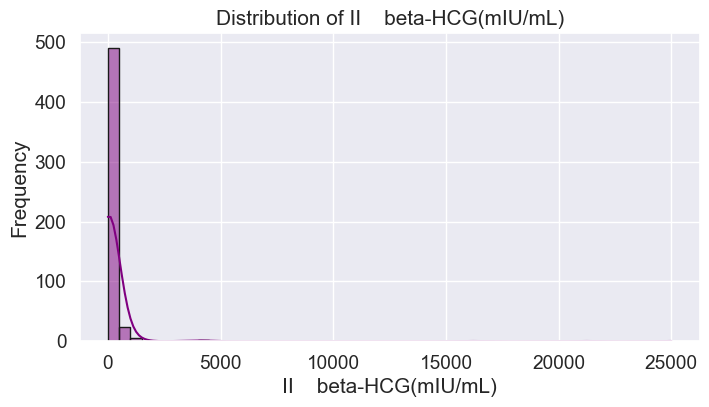

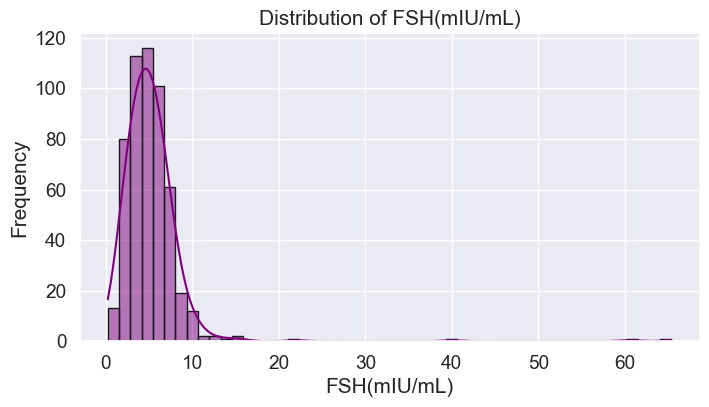

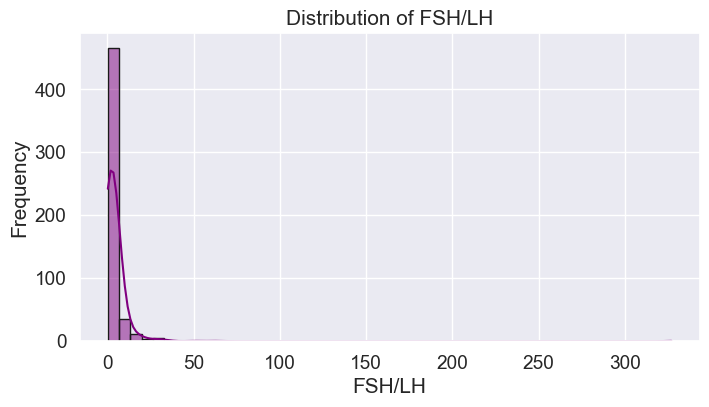

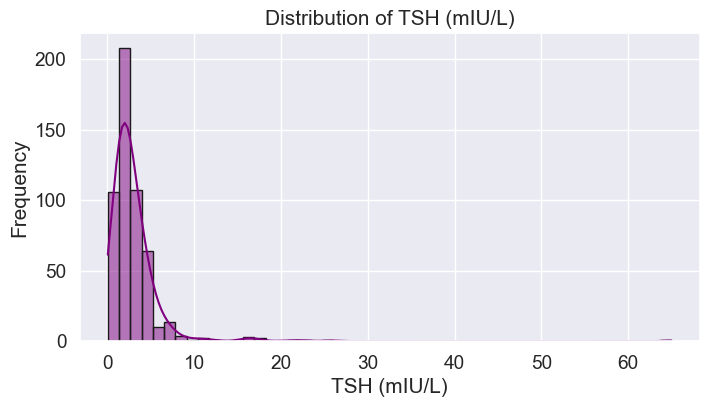

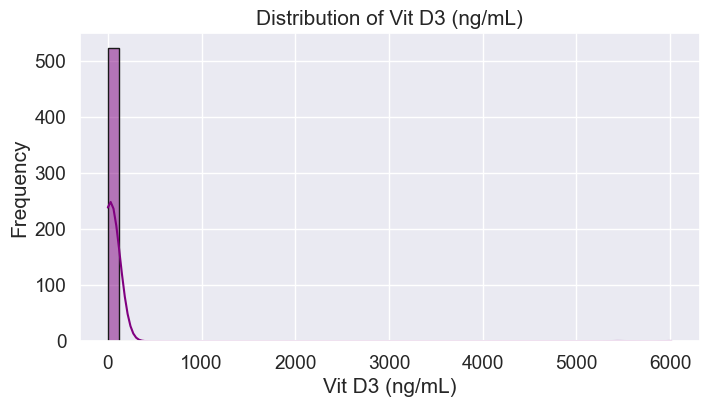

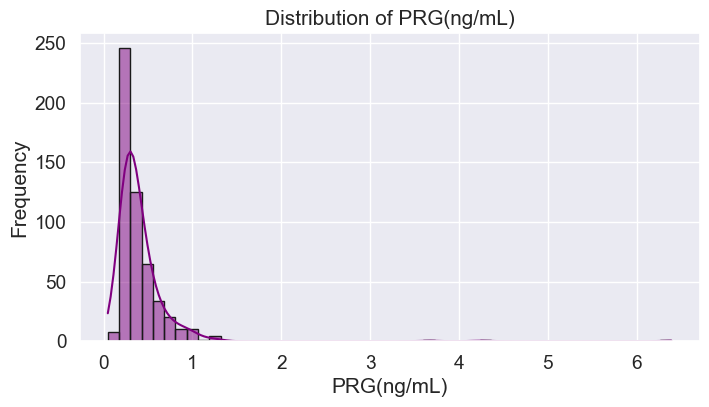

In [211]:
columns = ["I   beta-HCG(mIU/mL)", "II    beta-HCG(mIU/mL)", "FSH(mIU/mL)", "FSH/LH", "TSH (mIU/L)", "Vit D3 (ng/mL)", "PRG(ng/mL)"]

for col in columns:
    if col in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, linewidth=1, edgecolor="k", color="purple", bins = 50)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


In [212]:
numeric_var

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm)',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'No. of aborptions',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [213]:
numeric_axis_name = [
    "Age of the Patient", 
    "Weight of the Patient (in Kg)", 
    "Height of the Patient (in Cm)", 
    "Body Mass Index (BMI)", 
    "Pulse Rate (in bpm)", 
    "Respiratory Rate (in breaths/min)", 
    "Hemoglobin Level (in g/dl)", 
    "Cycle Length (in days)", 
    "Years of Marriage", 
    "Number of Abortions", 
    "Initial beta-HCG Level (in mIU/mL)", 
    "Subsequent beta-HCG Level (in mIU/mL)", 
    "Follicle Stimulating Hormone (FSH) Level (in mIU/mL)", 
    "Luteinizing Hormone (LH) Level (in mIU/mL)", 
    "FSH to LH Ratio", 
    "Hip Circumference (in inches)", 
    "Waist Circumference (in inches)", 
    "Waist to Hip Ratio", 
    "Thyroid-Stimulating Hormone (TSH) Level (in mIU/L)", 
    "Anti-Müllerian Hormone (AMH) Level (in ng/mL)", 
    "Prolactin Level (in ng/mL)", 
    "Vitamin D3 Level (in ng/mL)", 
    "Progesterone Level (in ng/mL)", 
    "Random Blood Sugar Level (in mg/dL)", 
    "Systolic Blood Pressure (in mmHg)", 
    "Diastolic Blood Pressure (in mmHg)", 
    "Number of Follicles in Left Ovary", 
    "Number of Follicles in Right Ovary", 
    "Average Follicle Size in Left Ovary (in mm)", 
    "Average Follicle Size in Right Ovary (in mm)", 
    "Endometrium Thickness (in mm)"
]


In [214]:
list(zip(numeric_var, numeric_axis_name))

[('Age (yrs)', 'Age of the Patient'),
 ('Weight (Kg)', 'Weight of the Patient (in Kg)'),
 ('Height(Cm)', 'Height of the Patient (in Cm)'),
 ('BMI', 'Body Mass Index (BMI)'),
 ('Blood Group', 'Pulse Rate (in bpm)'),
 ('Pulse rate(bpm)', 'Respiratory Rate (in breaths/min)'),
 ('RR (breaths/min)', 'Hemoglobin Level (in g/dl)'),
 ('Hb(g/dl)', 'Cycle Length (in days)'),
 ('Cycle length(days)', 'Years of Marriage'),
 ('Marraige Status (Yrs)', 'Number of Abortions'),
 ('No. of aborptions', 'Initial beta-HCG Level (in mIU/mL)'),
 ('I   beta-HCG(mIU/mL)', 'Subsequent beta-HCG Level (in mIU/mL)'),
 ('II    beta-HCG(mIU/mL)',
  'Follicle Stimulating Hormone (FSH) Level (in mIU/mL)'),
 ('FSH(mIU/mL)', 'Luteinizing Hormone (LH) Level (in mIU/mL)'),
 ('LH(mIU/mL)', 'FSH to LH Ratio'),
 ('FSH/LH', 'Hip Circumference (in inches)'),
 ('Hip(inch)', 'Waist Circumference (in inches)'),
 ('Waist(inch)', 'Waist to Hip Ratio'),
 ('Waist:Hip Ratio', 'Thyroid-Stimulating Hormone (TSH) Level (in mIU/L)'),
 ('TS

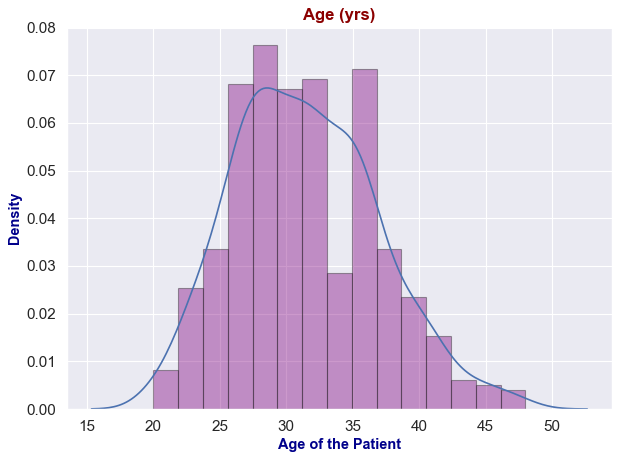

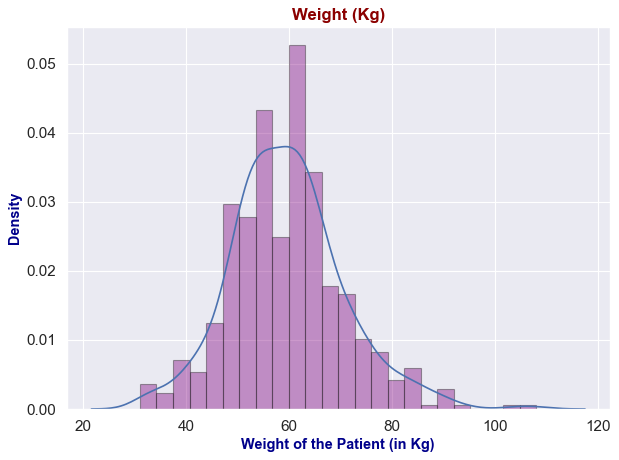

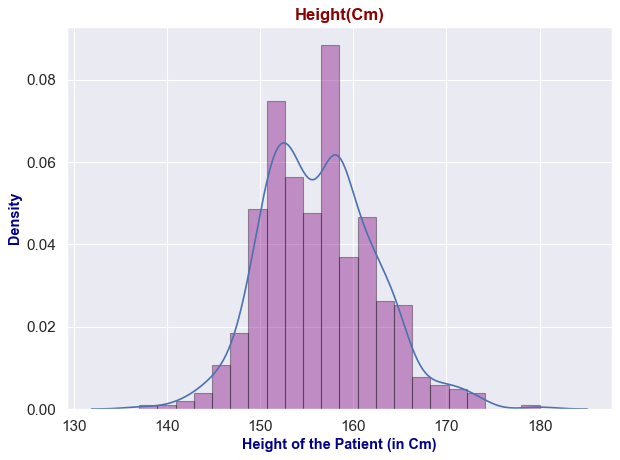

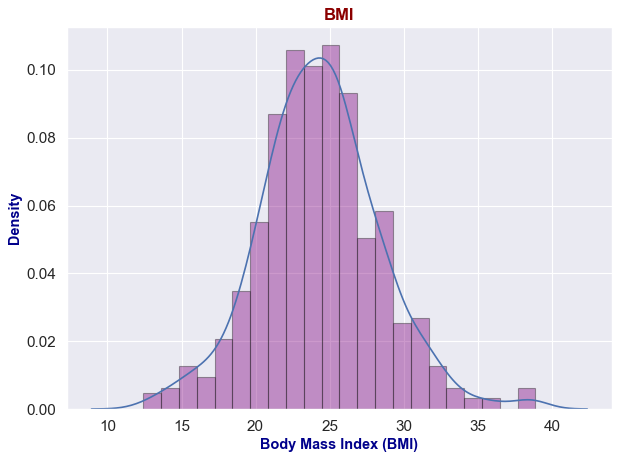

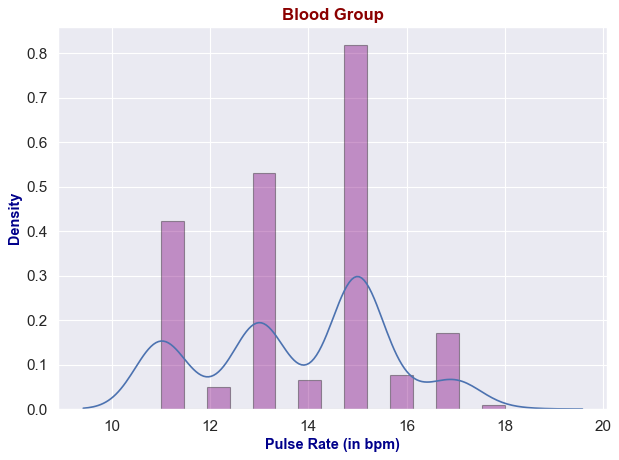

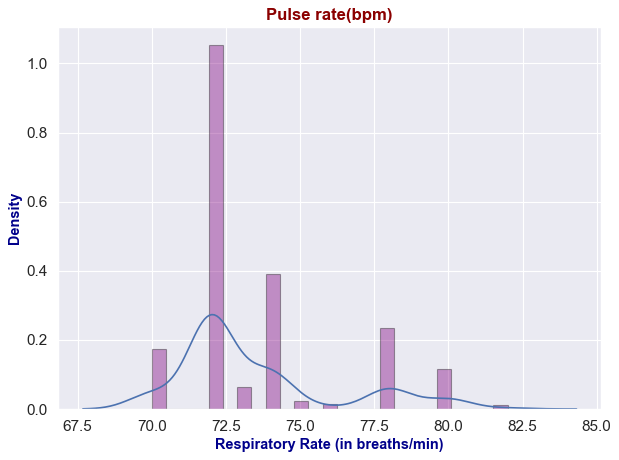

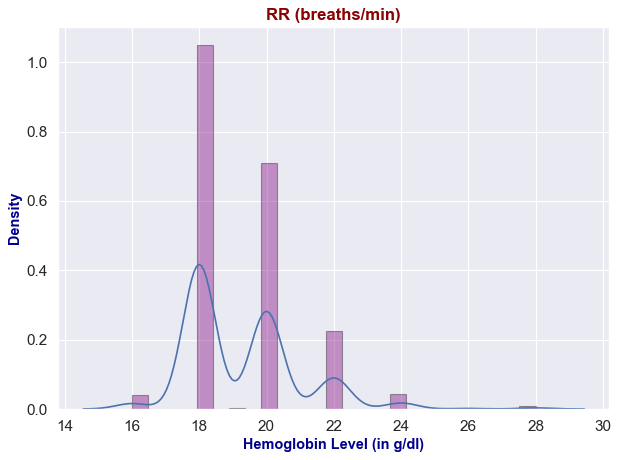

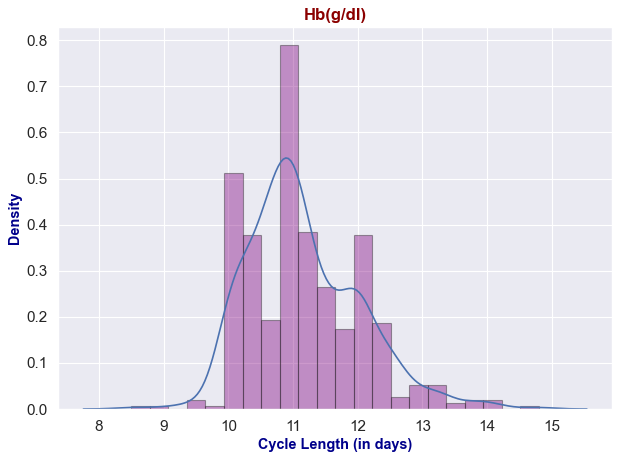

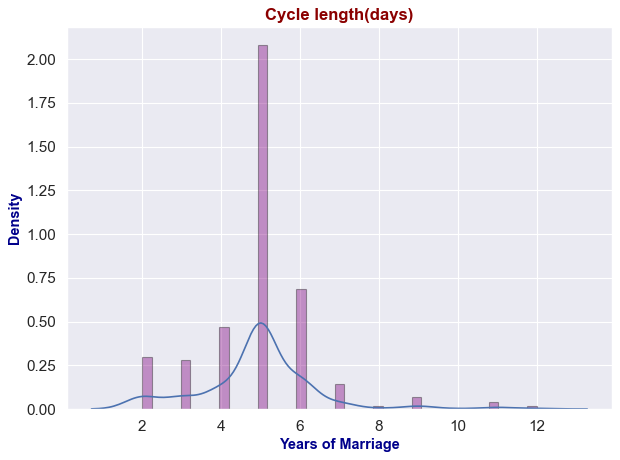

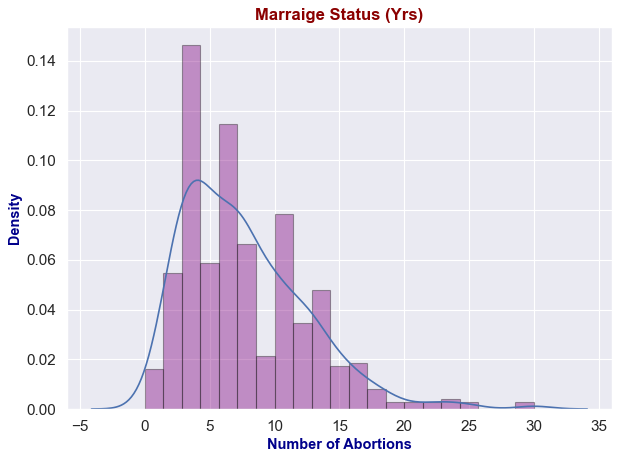

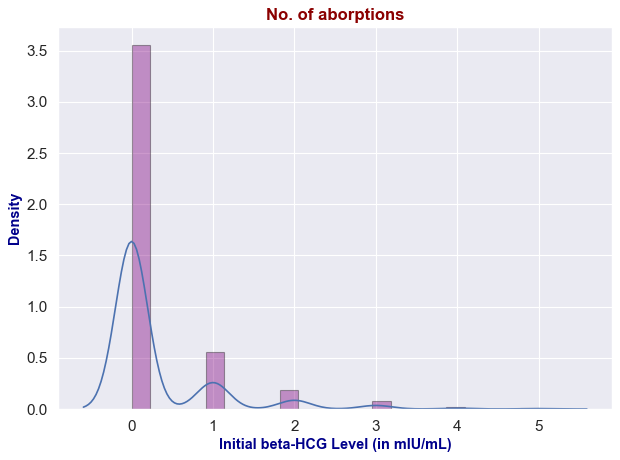

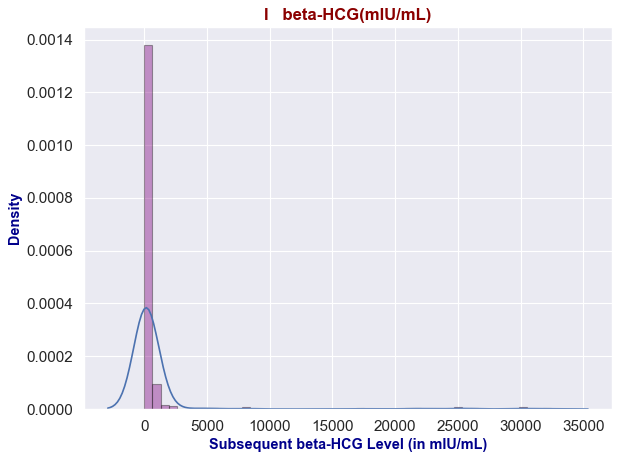

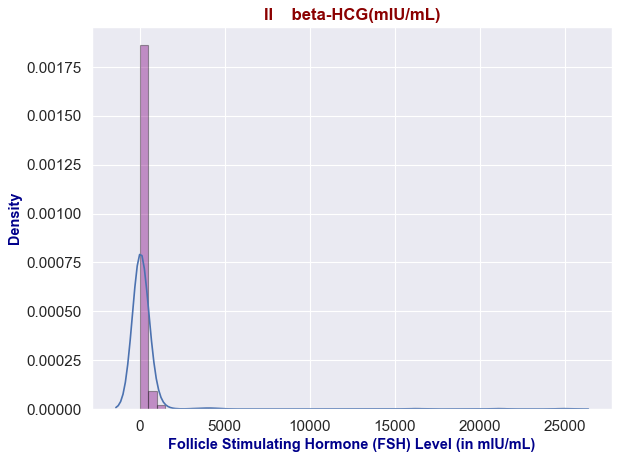

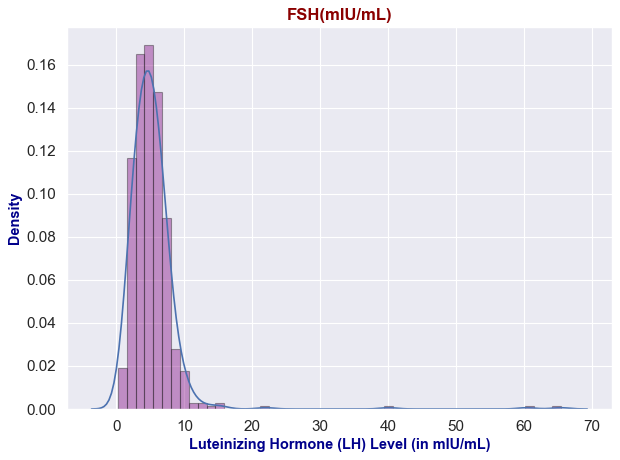

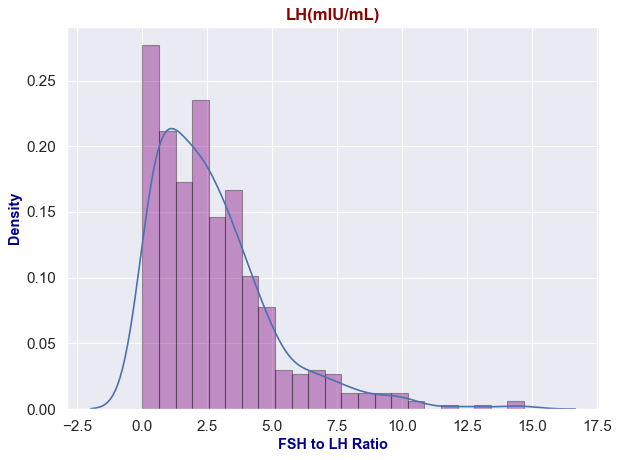

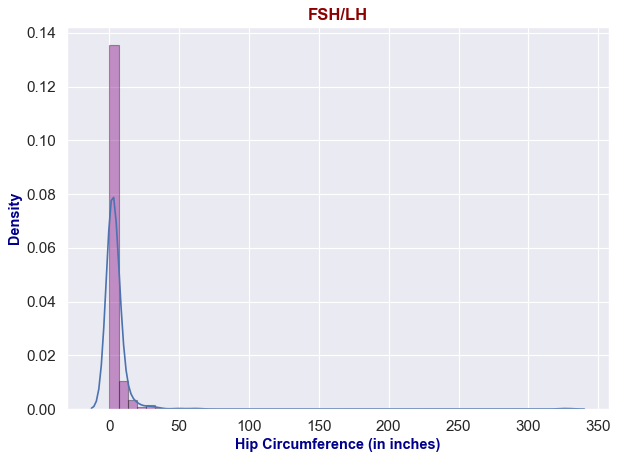

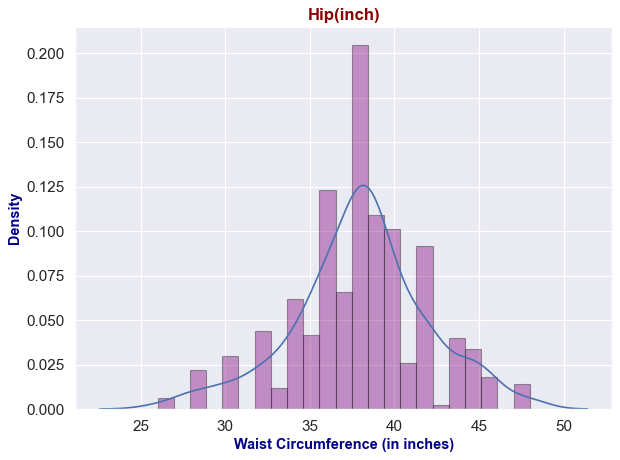

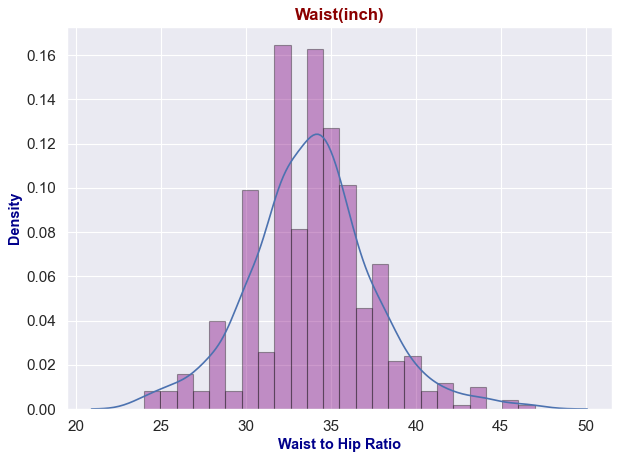

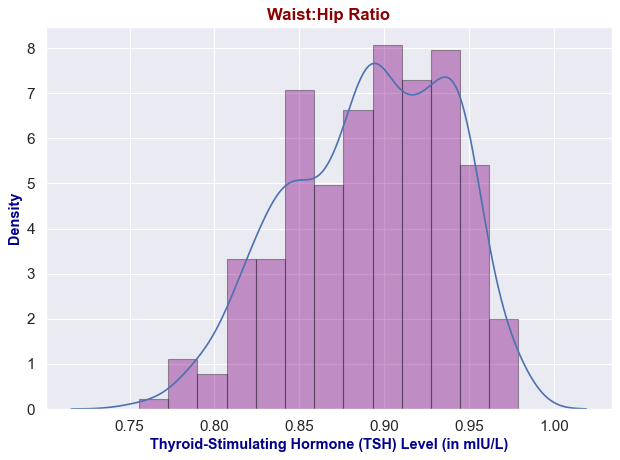

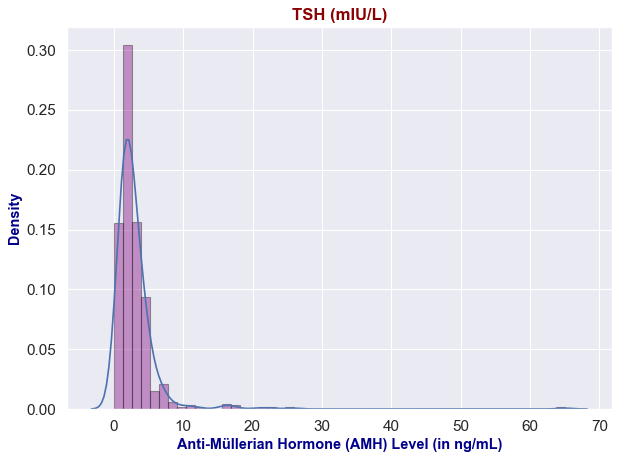

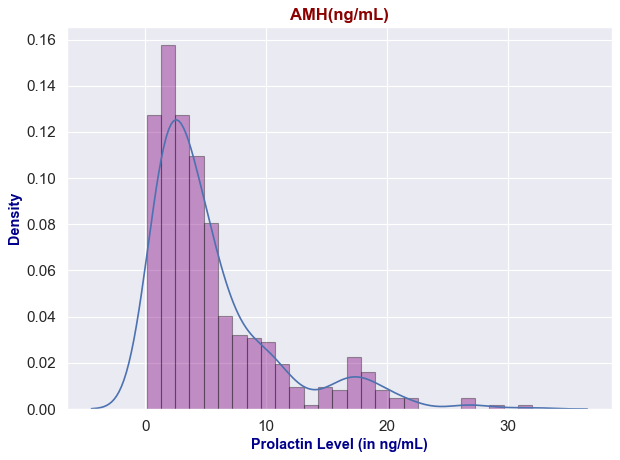

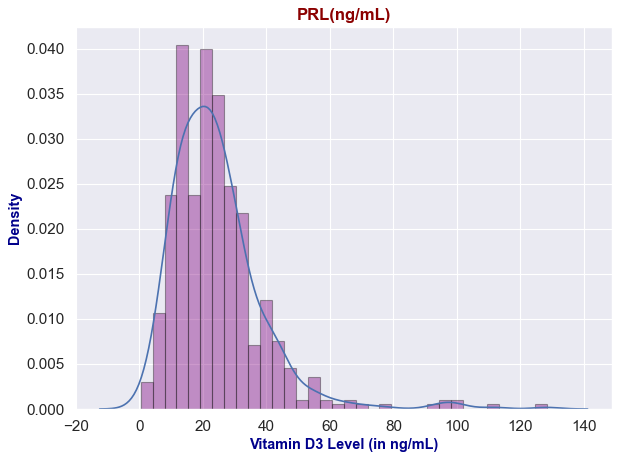

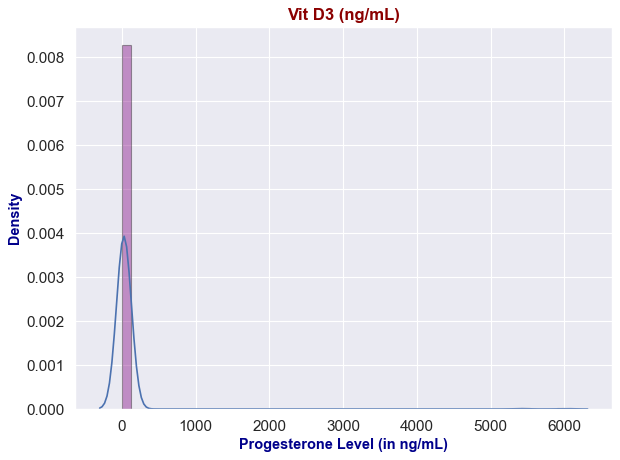

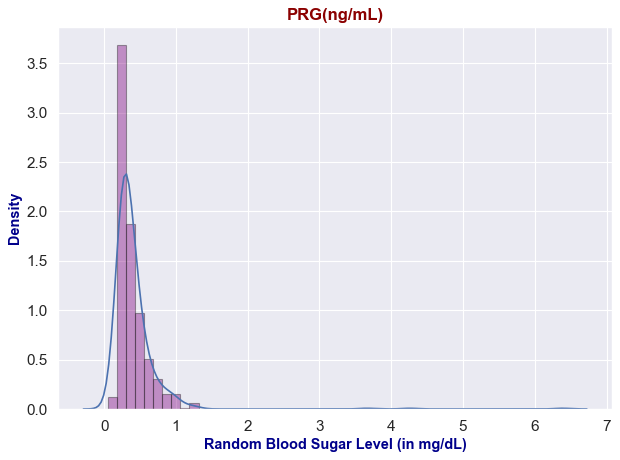

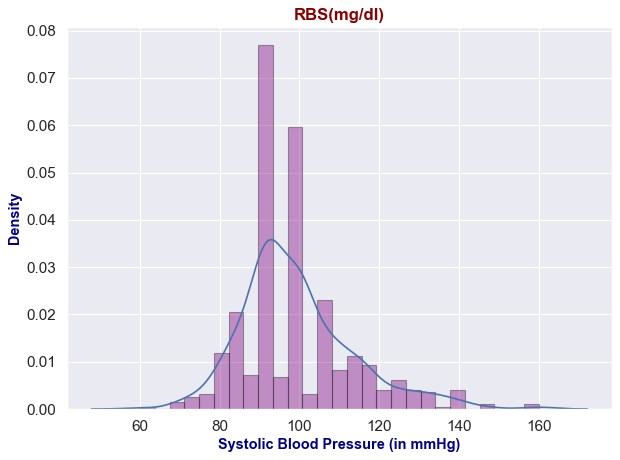

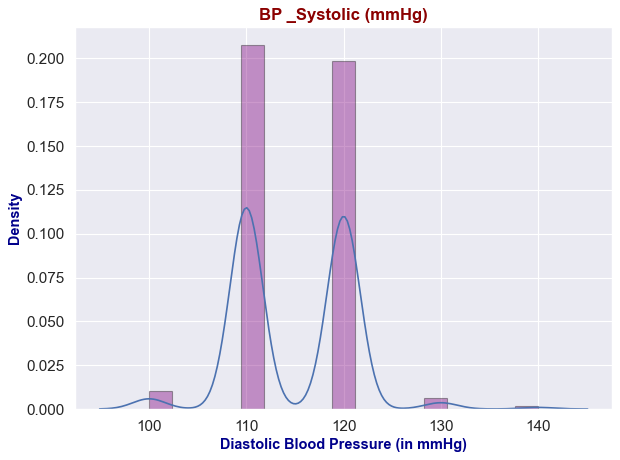

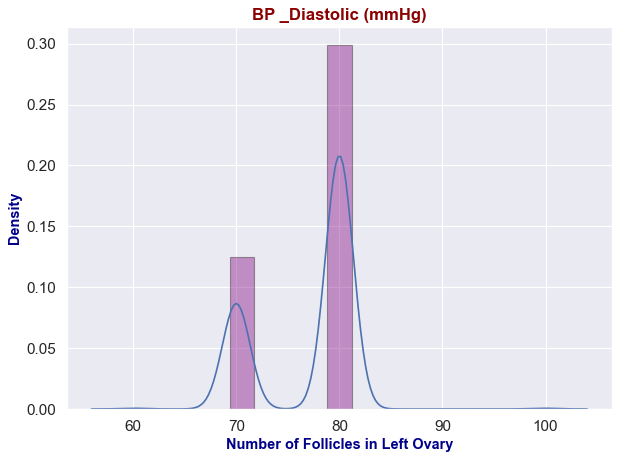

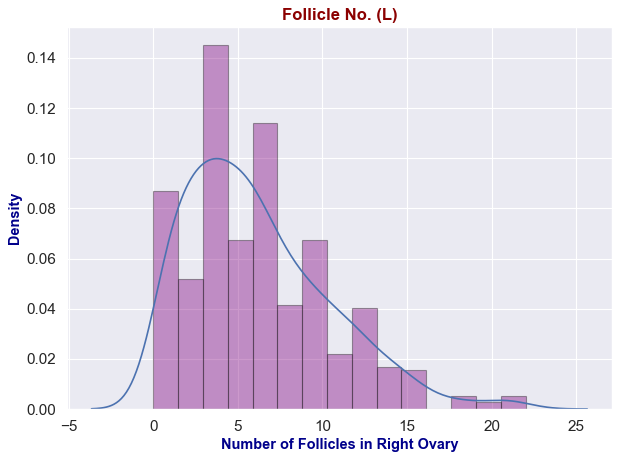

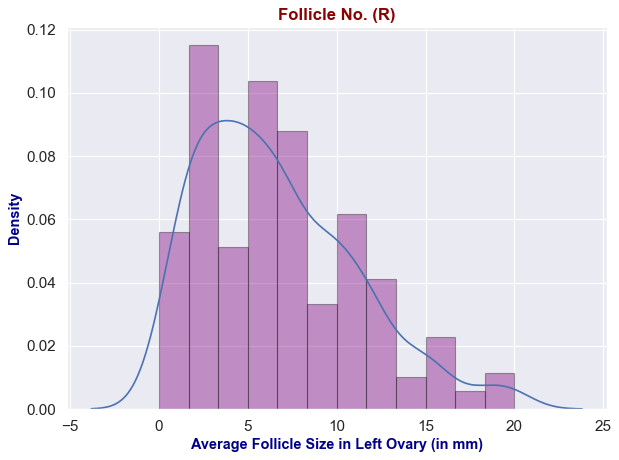

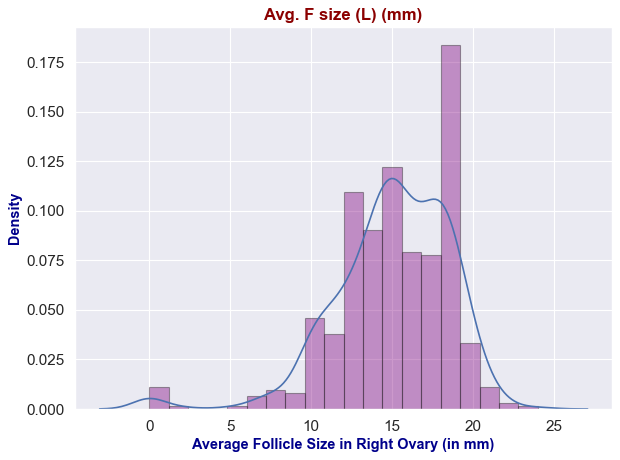

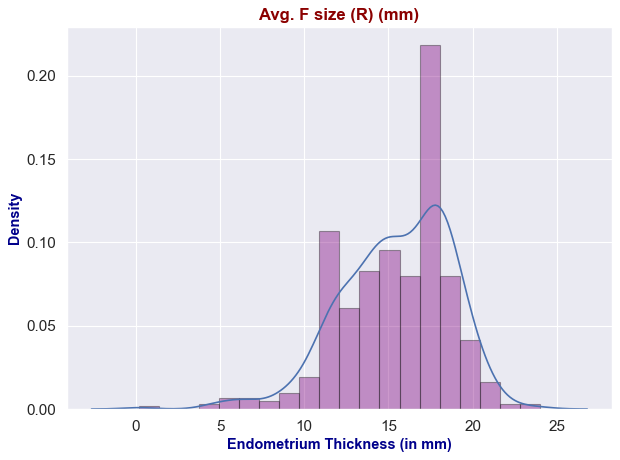

In [215]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(data[i], hist_kws = dict(linewidth = 1, edgecolor = "k", color = "purple"))
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [216]:
categoric_var

['PCOS (Y/N)',
 'Cycle(R/I)',
 'Pregnant(Y/N)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

In [217]:
categoric_axis_name = [
    "Presence of PCOS (Yes/No)",
    "Menstrual Cycle Regularity (Regular/Irregular)",
    "Pregnancy Status (Yes/No)",
    "Weight Gain Observed (Yes/No)",
    "Excess Hair Growth Observed (Yes/No)",
    "Skin Darkening Observed (Yes/No)",
    "Hair Loss Observed (Yes/No)",
    "Pimples Observed (Yes/No)",
    "Fast Food Consumption Habit (Yes/No)",
    "Regular Exercise Routine (Yes/No)"
]


In [218]:
list(zip(categoric_var, categoric_axis_name))

[('PCOS (Y/N)', 'Presence of PCOS (Yes/No)'),
 ('Cycle(R/I)', 'Menstrual Cycle Regularity (Regular/Irregular)'),
 ('Pregnant(Y/N)', 'Pregnancy Status (Yes/No)'),
 ('Weight gain(Y/N)', 'Weight Gain Observed (Yes/No)'),
 ('hair growth(Y/N)', 'Excess Hair Growth Observed (Yes/No)'),
 ('Skin darkening (Y/N)', 'Skin Darkening Observed (Yes/No)'),
 ('Hair loss(Y/N)', 'Hair Loss Observed (Yes/No)'),
 ('Pimples(Y/N)', 'Pimples Observed (Yes/No)'),
 ('Fast food (Y/N)', 'Fast Food Consumption Habit (Yes/No)'),
 ('Reg.Exercise(Y/N)', 'Regular Exercise Routine (Yes/No)')]

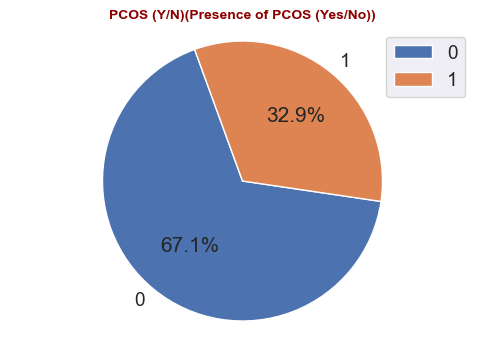

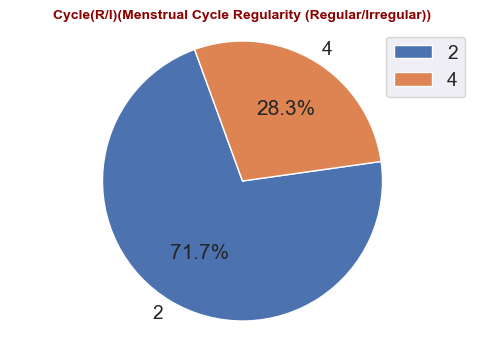

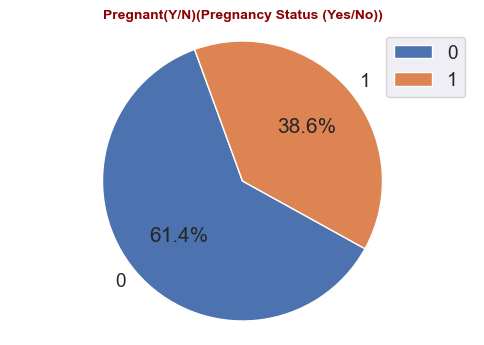

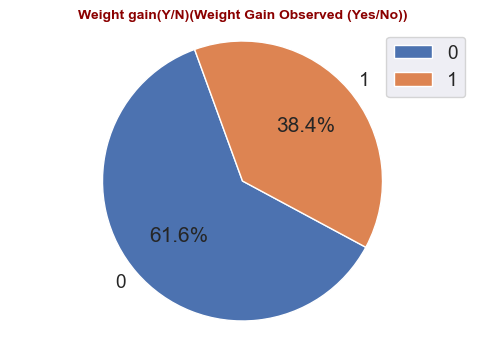

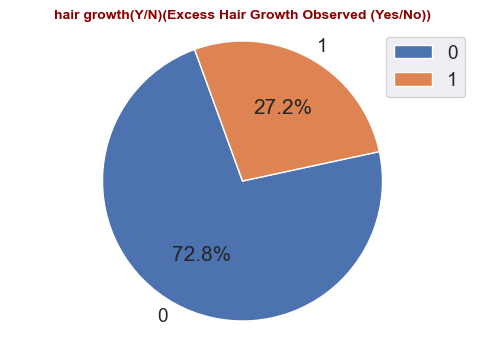

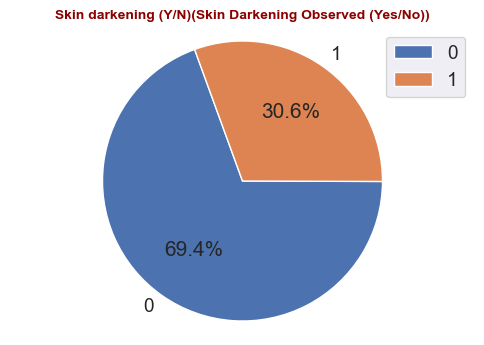

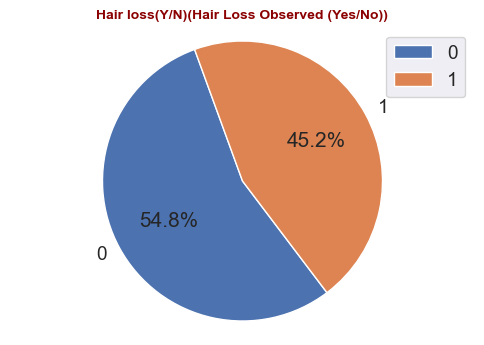

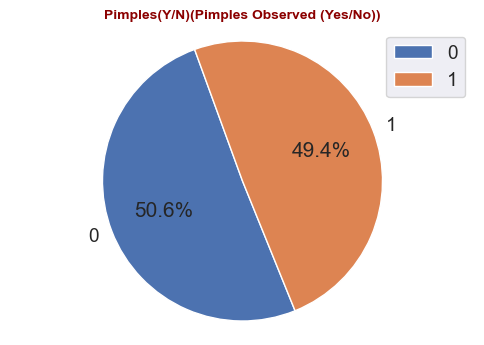

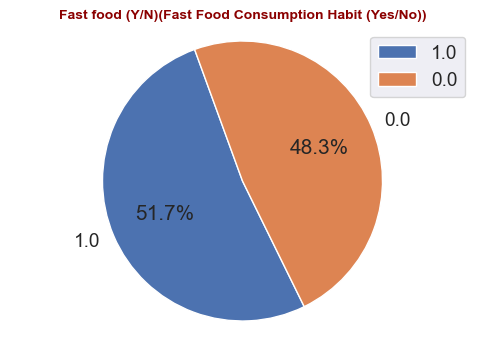

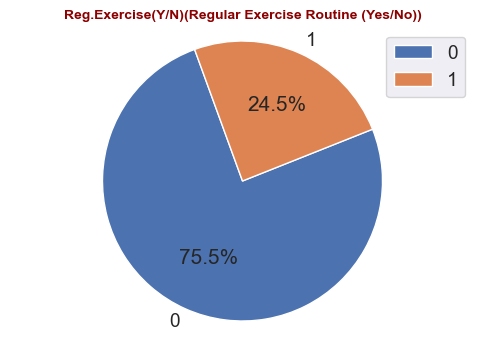

In [239]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 10}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 10}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (6, 4))
    
    observation_values = list(data[i].value_counts().index)
    total_observation_values = list(data[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal")
    
    plt.title((i + "(" + z + ")"), fontdict = title_font)
    plt.legend()
    plt.show()

In [220]:
numeric_var

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm)',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'No. of aborptions',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

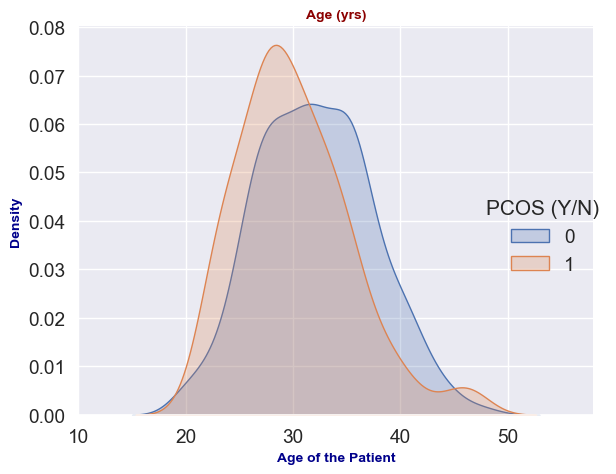

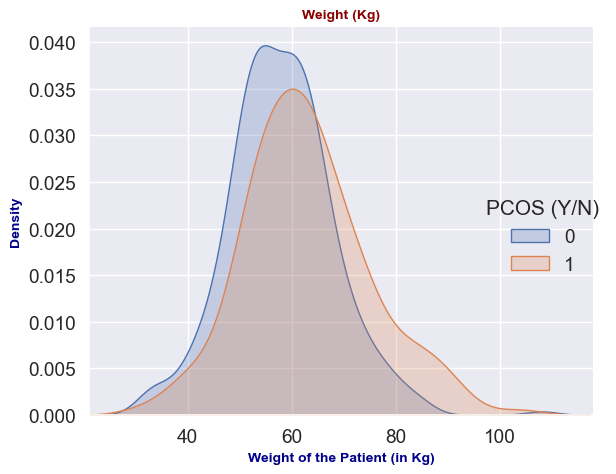

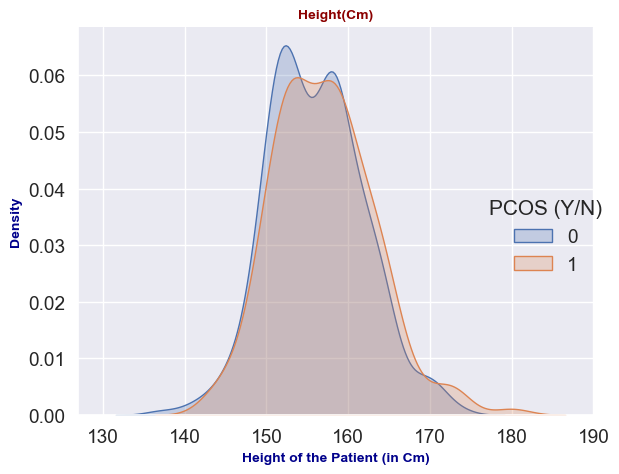

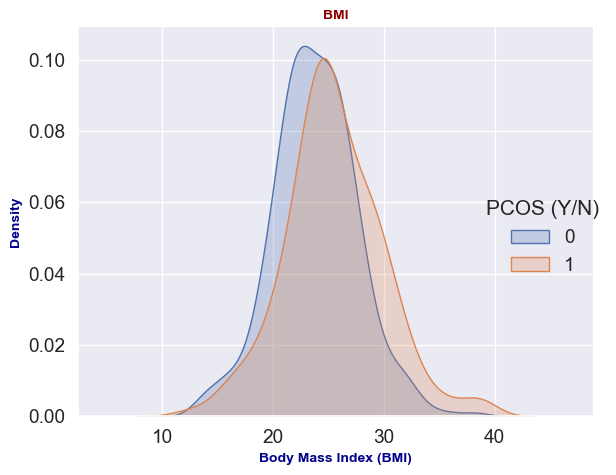

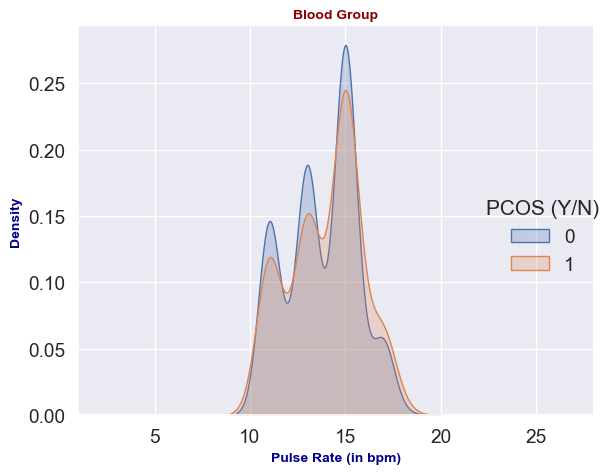

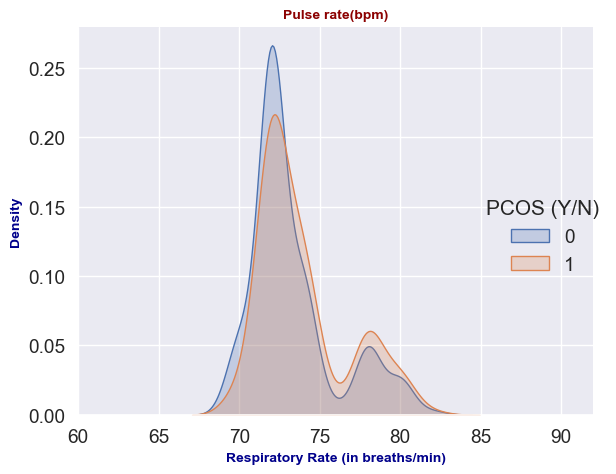

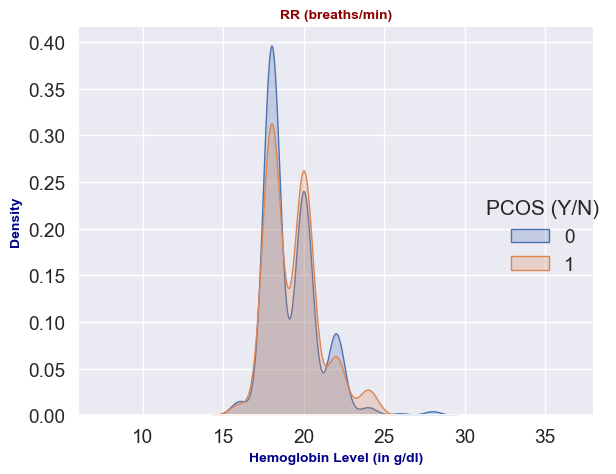

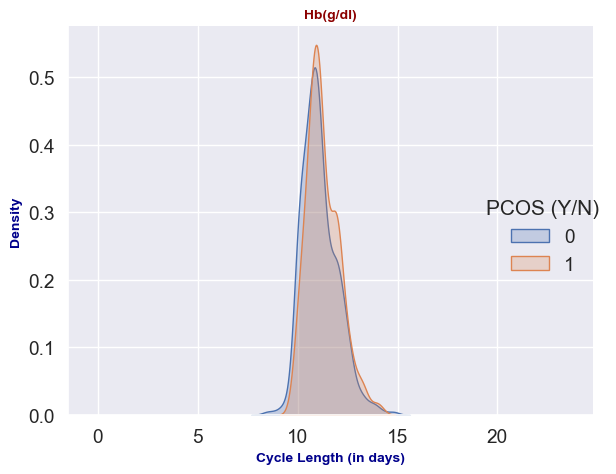

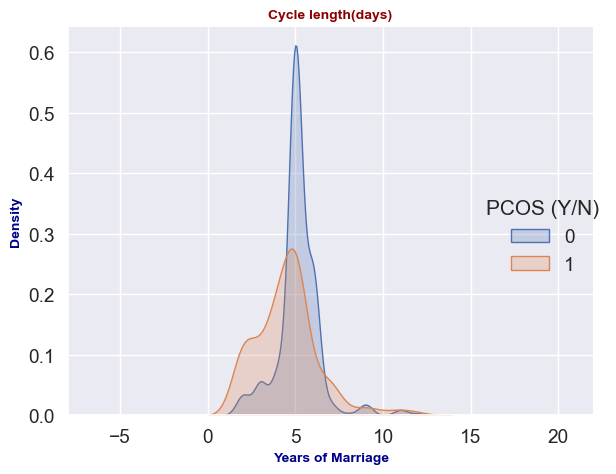

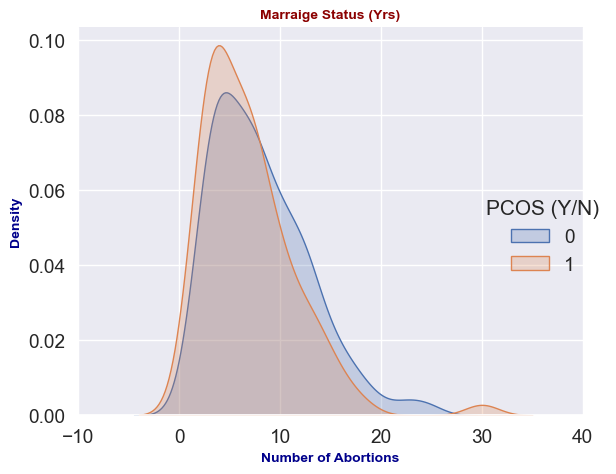

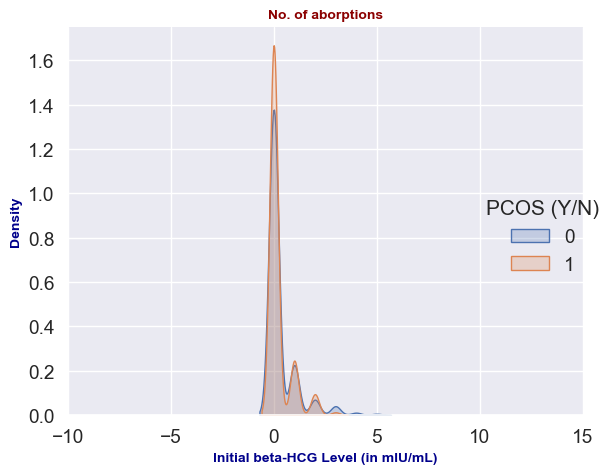

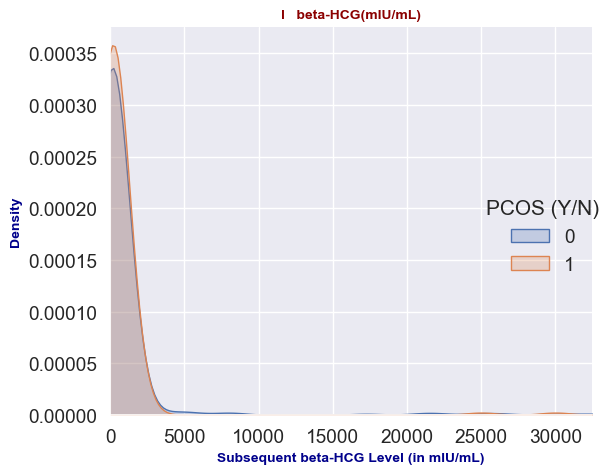

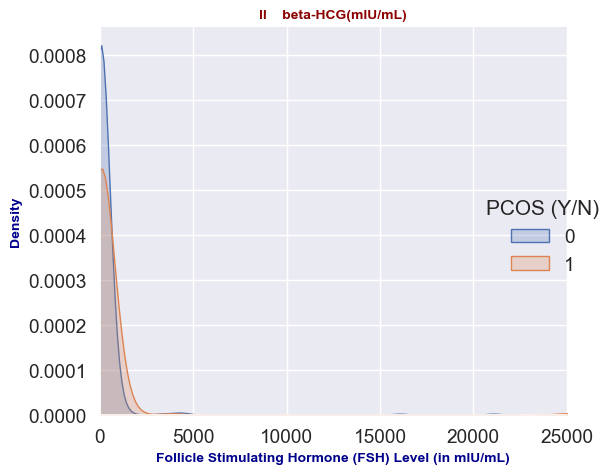

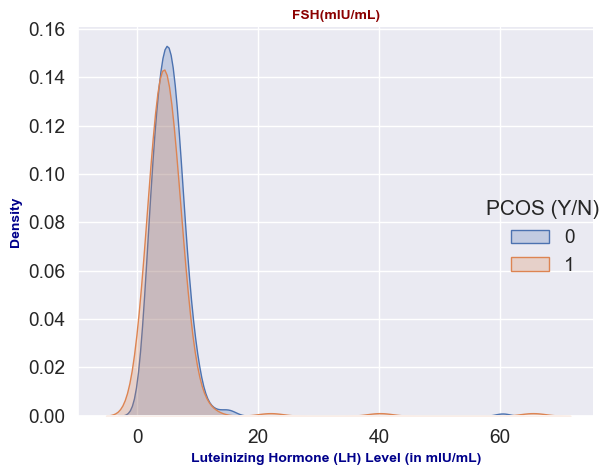

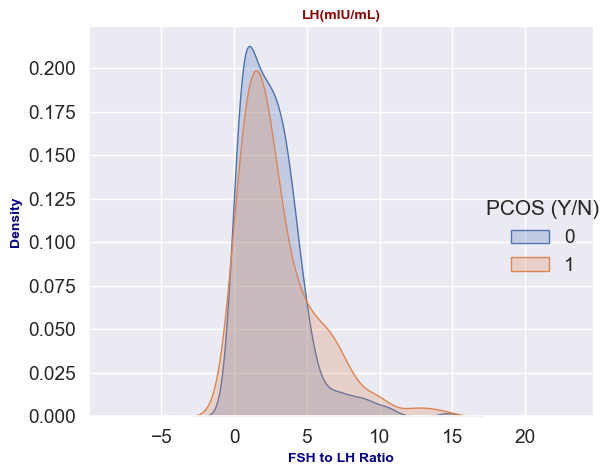

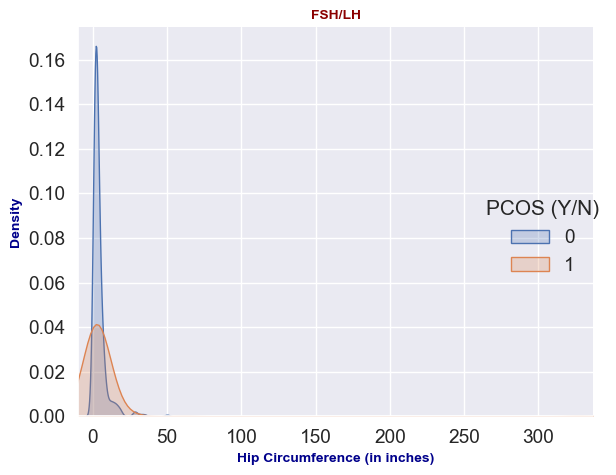

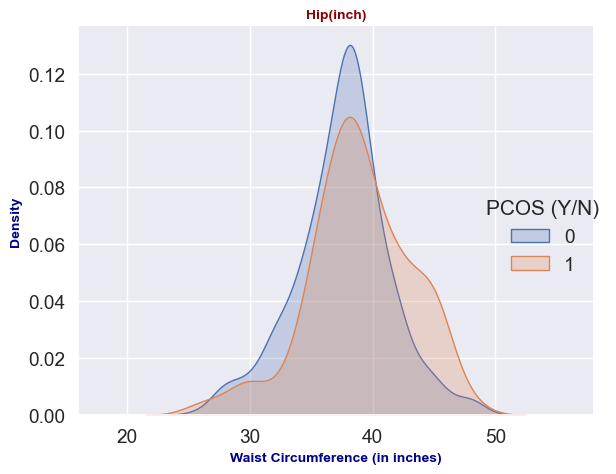

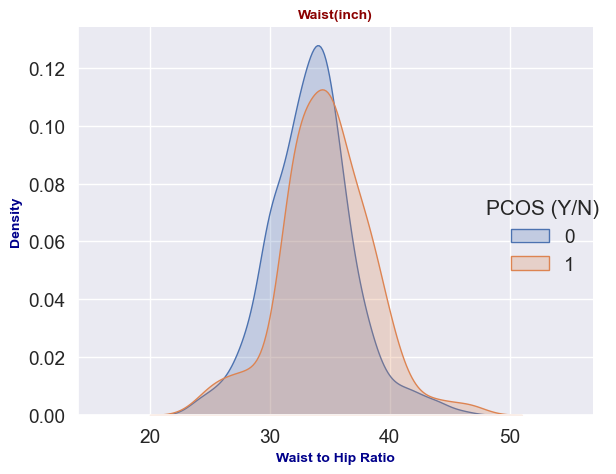

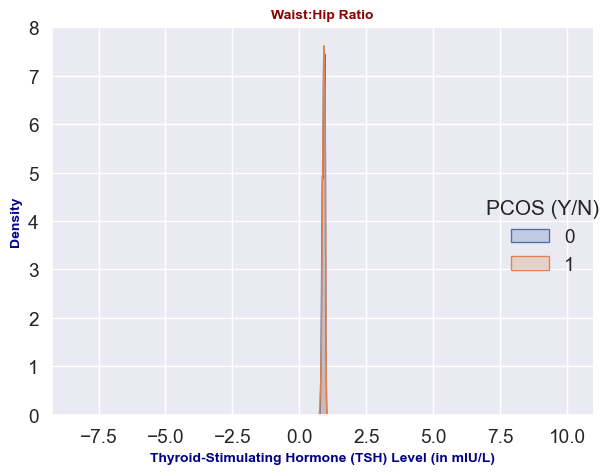

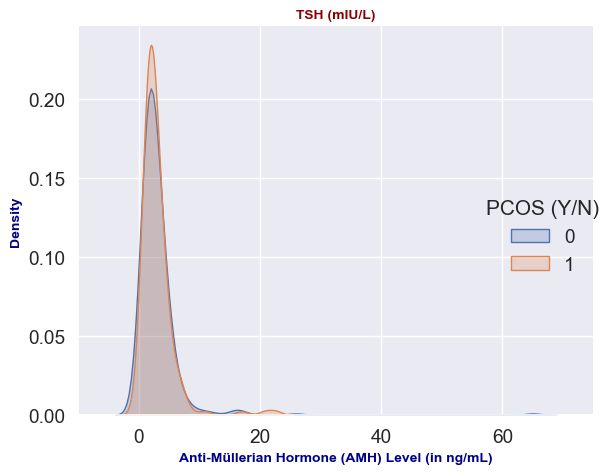

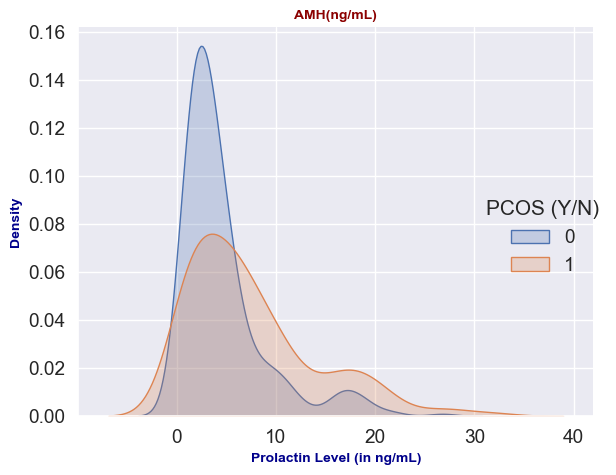

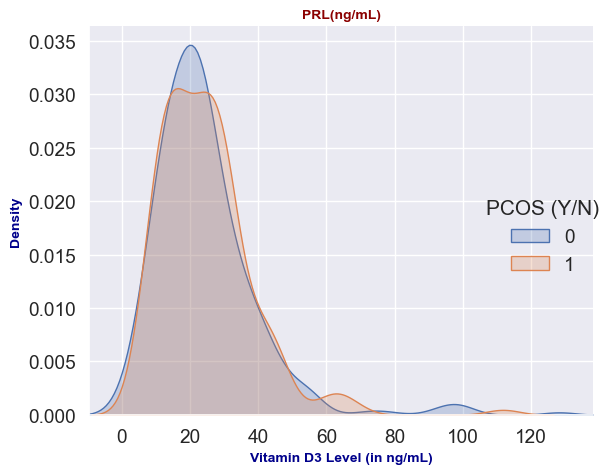

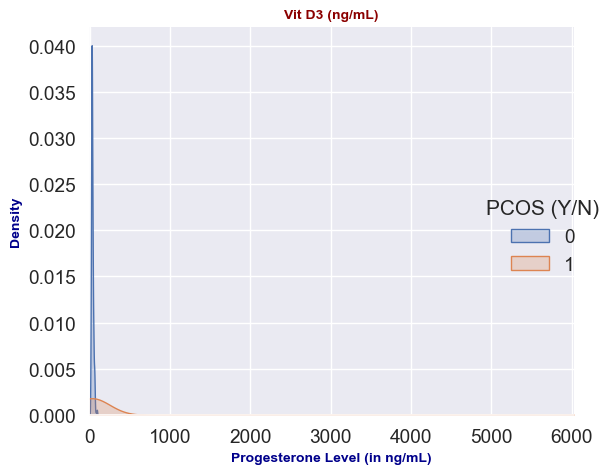

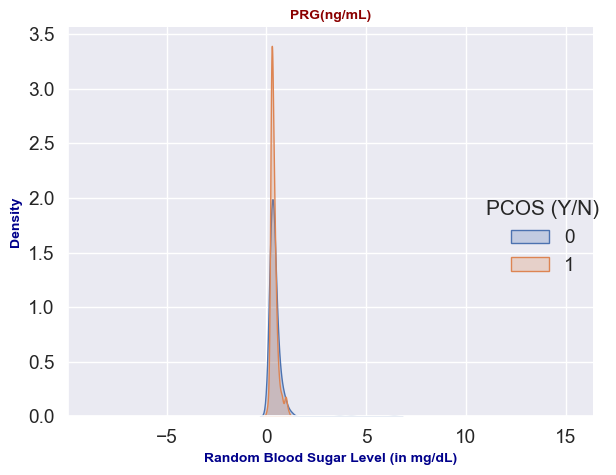

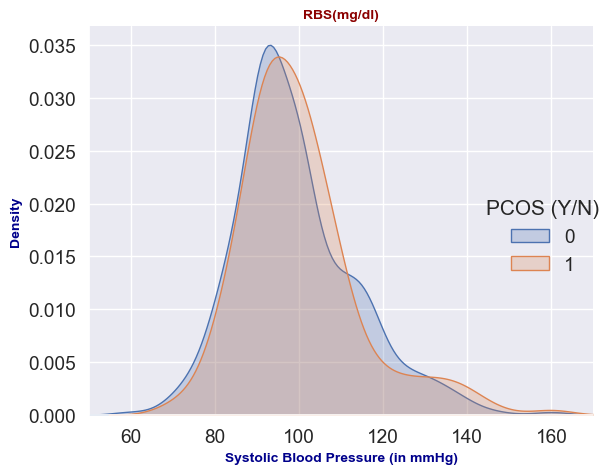

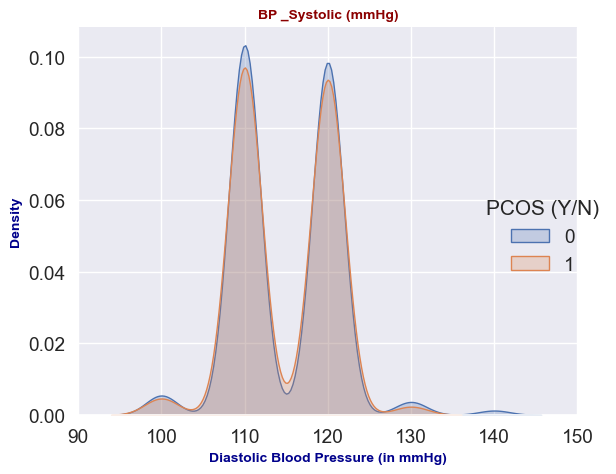

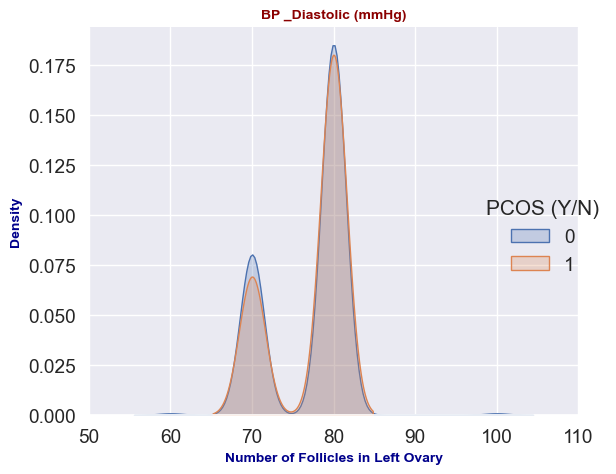

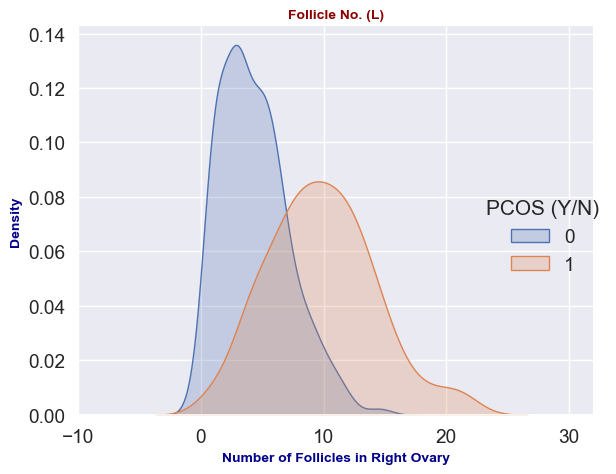

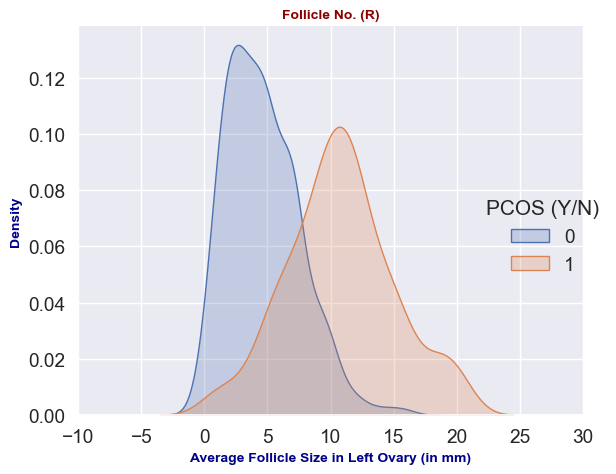

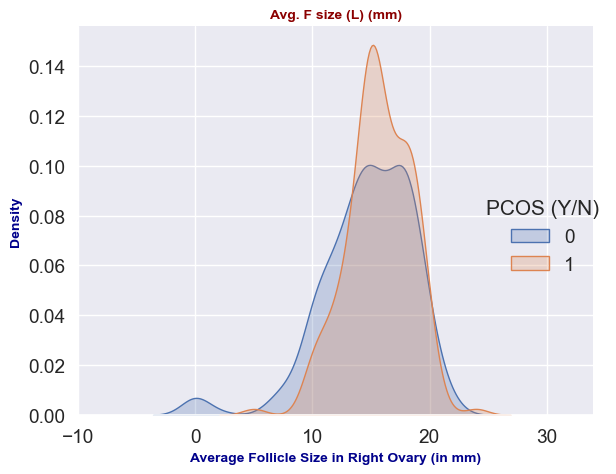

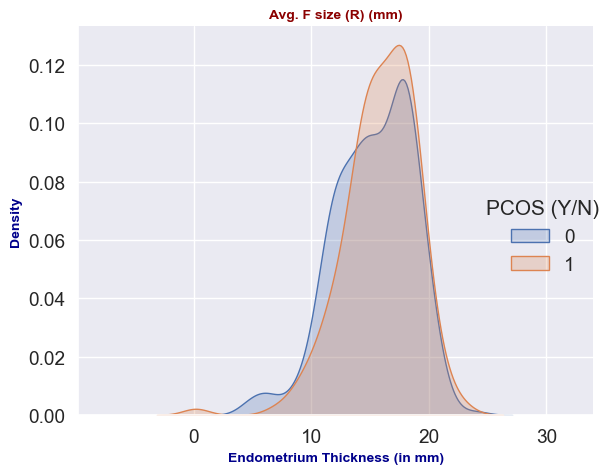

In [240]:
for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(data, hue="PCOS (Y/N)", height=5, xlim=((data[i].min() - 10), (data[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()
    
    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Density", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()


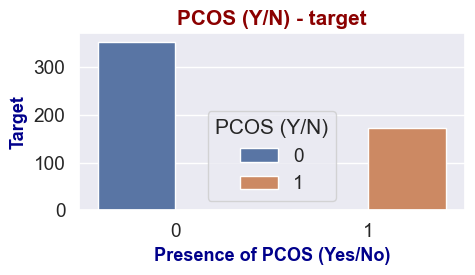

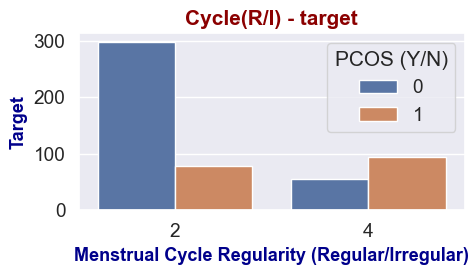

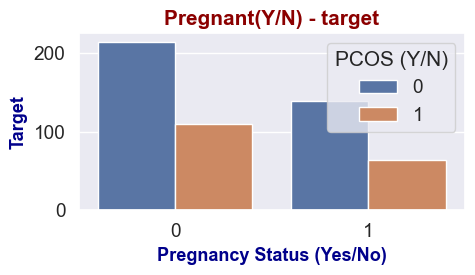

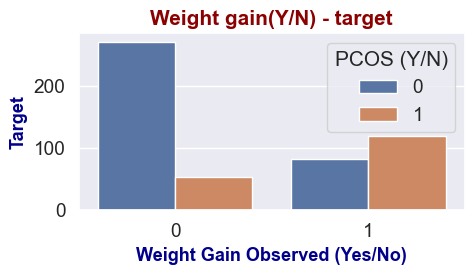

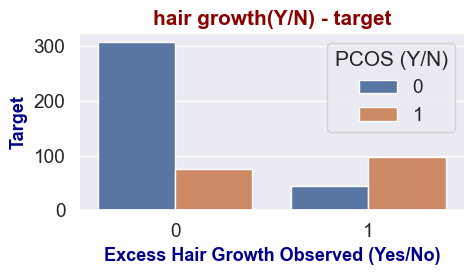

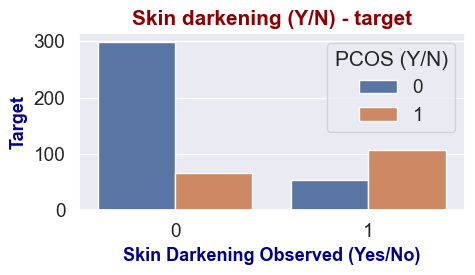

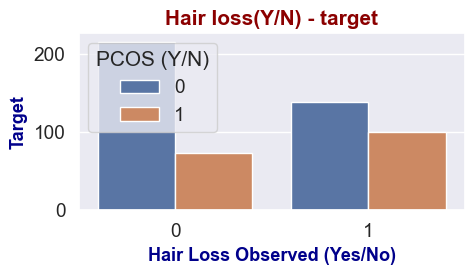

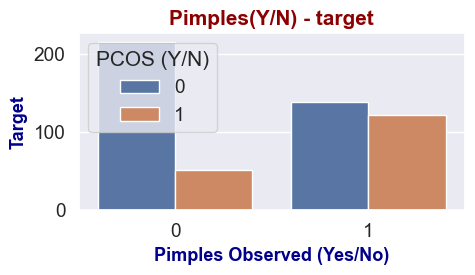

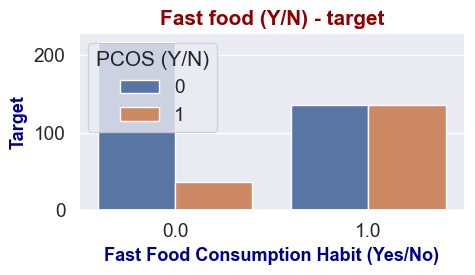

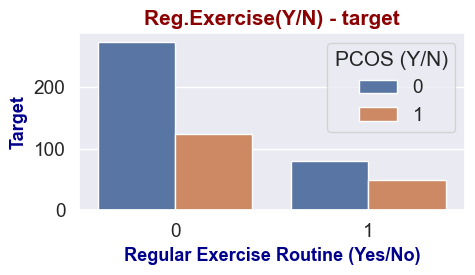

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}
data["PCOS (Y/N)"] = data["PCOS (Y/N)"].astype(str)

for i, z in zip(categoric_var, categoric_axis_name):
    plt.figure(figsize=(5, 3))
    sns.countplot(x=i, data=data, hue="PCOS (Y/N)")
    
    plt.title(i + " - target", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Target", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()


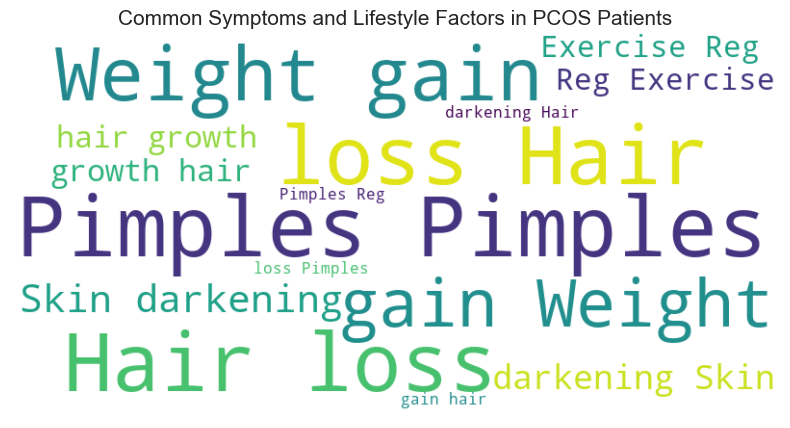

In [223]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df1.columns = df1.columns.str.strip()
symptom_columns = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
                   'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']
text_data = []
for col in symptom_columns:
    text_data.extend([col.replace("(Y/N)", "").strip() for value in df1[col] if str(value).strip() in ["Y", "1"]])
if text_data:
    text_string = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_string)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Common Symptoms and Lifestyle Factors in PCOS Patients")
    plt.show()
else:
    print("No valid data found for generating the word cloud.")

In [224]:
!pip install flask flask-sqlalchemy flask-login pandas scikit-learn numpy


In [225]:
import pickle

# Save your trained model
with open("pcos_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


In [226]:
import os
print(os.getcwd())  # This shows where your file is saved


C:\Users\thano


In [227]:
import sklearn
print(sklearn.__version__)  # Check the version


1.6.1


In [228]:
!pip install --upgrade scikit-learn


In [229]:
import pickle
from sklearn.ensemble import RandomForestClassifier  # Import your model

# Train the model again
model = RandomForestClassifier()
model.fit(X_train, y_train)  # Make sure X_train and y_train are available

# Save the model again
with open("pcos_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully!")


Model saved successfully!


In [230]:
import sklearn
print(sklearn.__version__)


1.6.1


In [232]:
print(df1.columns)  # To check actual column names in PCOS_infertility.csv


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


In [233]:
print(df2.columns)  # To check actual column names in PCOS_data_without_infertility.xlsx


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')


NameError: name 'plots' is not defined

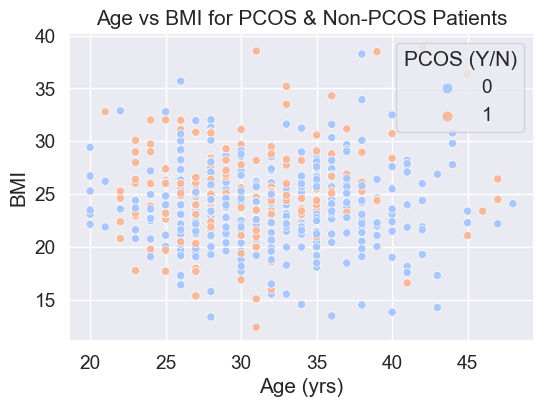

In [236]:
 # Scatter Plot: Age vs BMI for PCOS and Non-PCOS
import io
import base64    
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df1["Age (yrs)"], y=df1["BMI"], hue=df1["PCOS (Y/N)"], palette="coolwarm")
plt.title("Age vs BMI for PCOS & Non-PCOS Patients")
plt.xlabel("Age (yrs)")
plt.ylabel("BMI")
scatter_img = io.BytesIO()
plt.savefig(scatter_img, format="png")
scatter_img.seek(0)
plots["scatter_plot"] = base64.b64encode(scatter_img.getvalue()).decode()

In [237]:
print("df1 columns:", df1.columns.tolist())
print("df2 columns:", df2.columns.tolist())


df1 columns: ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Unnamed: 44']
df2 columns: ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']
